In [ ]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [ ]:
!pip install imblearn

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.offline as py
import plotly.express as px
import plotly.graph_objs as go
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import RFE
from sklearn.feature_selection import SelectFromModel

from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn import model_selection
from sklearn.utils import class_weight
from xgboost import XGBClassifier

#Evaluating algorithms
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import classification_report

#Dealing with imbalanced dataset
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss




##Loading the Dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/kaggle/framingham.csv')

In [ ]:
df.rename(columns = {'male':'sex'}, inplace = True)

In [ ]:
df.head()

sex  age  education  currentSmoker  cigsPerDay  BPMeds  prevalentStroke  \
0    1   39        4.0              0         0.0     0.0                0   
1    0   46        2.0              0         0.0     0.0                0   
2    1   48        1.0              1        20.0     0.0                0   
3    0   61        3.0              1        30.0     0.0                0   
4    0   46        3.0              1        23.0     0.0                0   

   prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  \
0             0         0    195.0  106.0   70.0  26.97       80.0     77.0   
1             0         0    250.0  121.0   81.0  28.73       95.0     76.0   
2             0         0    245.0  127.5   80.0  25.34       75.0     70.0   
3             1         0    225.0  150.0   95.0  28.58       65.0    103.0   
4             0         0    285.0  130.0   84.0  23.10       85.0     85.0   

   TenYearCHD  
0           0  
1           0  
2           0  
3           1  
4           0

In [ ]:
df.tail()

sex  age  education  currentSmoker  cigsPerDay  BPMeds  prevalentStroke  \
4235    0   48        2.0              1        20.0     NaN                0   
4236    0   44        1.0              1        15.0     0.0                0   
4237    0   52        2.0              0         0.0     0.0                0   
4238    1   40        3.0              0         0.0     0.0                0   
4239    0   39        3.0              1        30.0     0.0                0   

      prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  \
4235             0         0    248.0  131.0   72.0  22.00       84.0   
4236             0         0    210.0  126.5   87.0  19.16       86.0   
4237             0         0    269.0  133.5   83.0  21.47       80.0   
4238             1         0    185.0  141.0   98.0  25.60       67.0   
4239             0         0    196.0  133.0   86.0  20.91       85.0   

      glucose  TenYearCHD  
4235     86.0           0  
4236      NaN           0  
4237    107.0           0  
4238     72.0           0  
4239     80.0           0

In [ ]:
df.sample(5)

sex  age  education  currentSmoker  cigsPerDay  BPMeds  prevalentStroke  \
3745    0   61        1.0              0         0.0     0.0                0   
2669    1   55        NaN              0         0.0     0.0                0   
2360    1   37        2.0              1        20.0     0.0                0   
4038    0   39        3.0              0         0.0     0.0                0   
2774    0   56        2.0              0         0.0     0.0                0   

      prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  \
3745             1         0    240.0  163.0  112.5  26.80       75.0   
2669             0         0    222.0  129.0   86.5  33.76       95.0   
2360             0         0    232.0  129.0   74.0  24.46       86.0   
4038             0         0    181.0  103.0   62.0  20.68       70.0   
2774             0         0    280.0  101.0   71.0  28.22       79.0   

      glucose  TenYearCHD  
3745     82.0           0  
2669     92.0           1  
2360     88.0           0  
4038     69.0           0  
2774     67.0           0

In [ ]:
df.shape

(4240, 16)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   sex              4240 non-null   int64  
 1   age              4240 non-null   int64  
 2   education        4135 non-null   float64
 3   currentSmoker    4240 non-null   int64  
 4   cigsPerDay       4211 non-null   float64
 5   BPMeds           4187 non-null   float64
 6   prevalentStroke  4240 non-null   int64  
 7   prevalentHyp     4240 non-null   int64  
 8   diabetes         4240 non-null   int64  
 9   totChol          4190 non-null   float64
 10  sysBP            4240 non-null   float64
 11  diaBP            4240 non-null   float64
 12  BMI              4221 non-null   float64
 13  heartRate        4239 non-null   float64
 14  glucose          3852 non-null   float64
 15  TenYearCHD       4240 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 530.1 KB


##Preprocessing the Dataset

###Checking and Removing the missing values

In [ ]:
missing_data=df.isnull().sum()
print("\nMissing data:")
print(missing_data)
total_percentage=(missing_data.sum()/df.shape[0])*100
print(f"The total percentage of missing data is {round(total_percentage,2)}%")


Missing data:
sex                  0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64
The total percentage of missing data is 15.21%


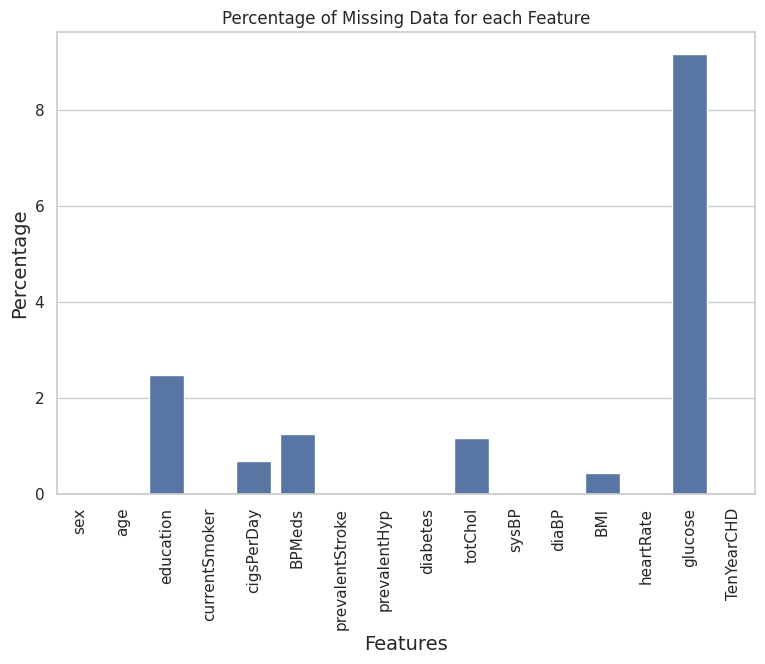

In [ ]:
# Calculating the percentage of missing data for each feature
missing_data = missing_data.to_frame(name='Total')  # Convert Series to DataFrame
missing_data['Percentage'] = (missing_data['Total'] / len(df)) * 100

# Creating a bar plot to visualize the percentage of missing data for each feature
plt.figure(figsize=(9, 6))
sns.set(style="whitegrid")
sns.barplot(x=missing_data.index, y=missing_data['Percentage'], data=missing_data)
plt.title("Percentage of Missing Data for each Feature")
plt.xlabel("Features", fontsize=14)
plt.ylabel("Percentage", fontsize=14)
plt.xticks(rotation=90)  # Rotate x-axis labels
plt.show()

In [ ]:
df.dropna(axis=0,inplace=True)

In [ ]:
df.shape

(3658, 16)

###Visualizing Total Cases

<ipython-input-16-d44838ee63fa>:1: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




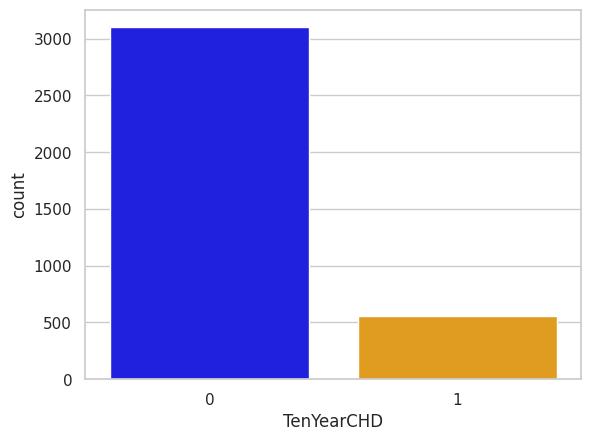

There are 3101 patients without heart disease and 557 patients with heart disease


In [ ]:
sns.countplot(x="TenYearCHD",data=df,palette=['blue',"orange"])
plt.show()
cases=df.TenYearCHD.value_counts()
print(f"There are {cases[0]} patients without heart disease and {cases[1]} patients with heart disease")

In [ ]:
df["age"].unique()

array([39, 46, 48, 61, 43, 63, 45, 52, 50, 41, 38, 42, 44, 47, 35, 60, 36,
       59, 54, 37, 53, 49, 65, 51, 62, 40, 56, 67, 57, 66, 64, 55, 58, 68,
       34, 33, 32, 70, 69])

In [ ]:
df["age"].min()

32

In [ ]:
df["age"].max()

70

In [ ]:
df.columns

Index(['sex', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [ ]:
categorical_features=['sex','education','currentSmoker','BPMeds','prevalentStroke','prevalentHyp','diabetes']
for feature in categorical_features:
  print(feature,":")
  print(df[feature].value_counts())
  print("------------------")

sex :
sex
0    2035
1    1623
Name: count, dtype: int64
------------------
education :
education
1.0    1526
2.0    1101
3.0     608
4.0     423
Name: count, dtype: int64
------------------
currentSmoker :
currentSmoker
0    1869
1    1789
Name: count, dtype: int64
------------------
BPMeds :
BPMeds
0.0    3547
1.0     111
Name: count, dtype: int64
------------------
prevalentStroke :
prevalentStroke
0    3637
1      21
Name: count, dtype: int64
------------------
prevalentHyp :
prevalentHyp
0    2518
1    1140
Name: count, dtype: int64
------------------
diabetes :
diabetes
0    3559
1      99
Name: count, dtype: int64
------------------


In [ ]:
numeric_features=["age","cigsPerDay","totChol","sysBP","diaBP","BMI","heartRate","glucose"]
for feature in numeric_features:
  print(feature,":")
  print(df[feature].value_counts())
  print("------------------")

age :
age
40    167
46    166
42    161
48    149
39    147
41    145
44    143
45    140
43    137
52    129
38    124
50    123
51    123
55    123
54    119
49    116
53    116
47    114
57    108
56    105
59    100
60     98
58     97
63     96
62     91
61     91
64     80
37     80
36     77
65     46
67     38
66     34
35     33
68     16
34     14
33      5
69      5
32      1
70      1
Name: count, dtype: int64
------------------
cigsPerDay :
cigsPerDay
0.0     1869
20.0     651
30.0     192
15.0     184
10.0     123
5.0       99
9.0       99
3.0       83
40.0      69
1.0       61
43.0      49
25.0      44
35.0      19
6.0       17
2.0       16
7.0       11
8.0        9
60.0       9
4.0        8
17.0       7
18.0       7
11.0       5
23.0       5
50.0       4
13.0       3
45.0       3
12.0       3
16.0       3
19.0       2
38.0       1
29.0       1
70.0       1
14.0       1
Name: count, dtype: int64
------------------
totChol :
totChol
240.0    69
260.0    58
220.0    58
232

##Exploratory Data Analysis

###Univariate Analysis

<ipython-input-23-743b77ce5ac2>:3: UserWarning:

To output multiple subplots, the figure containing the passed axes is being cleared.



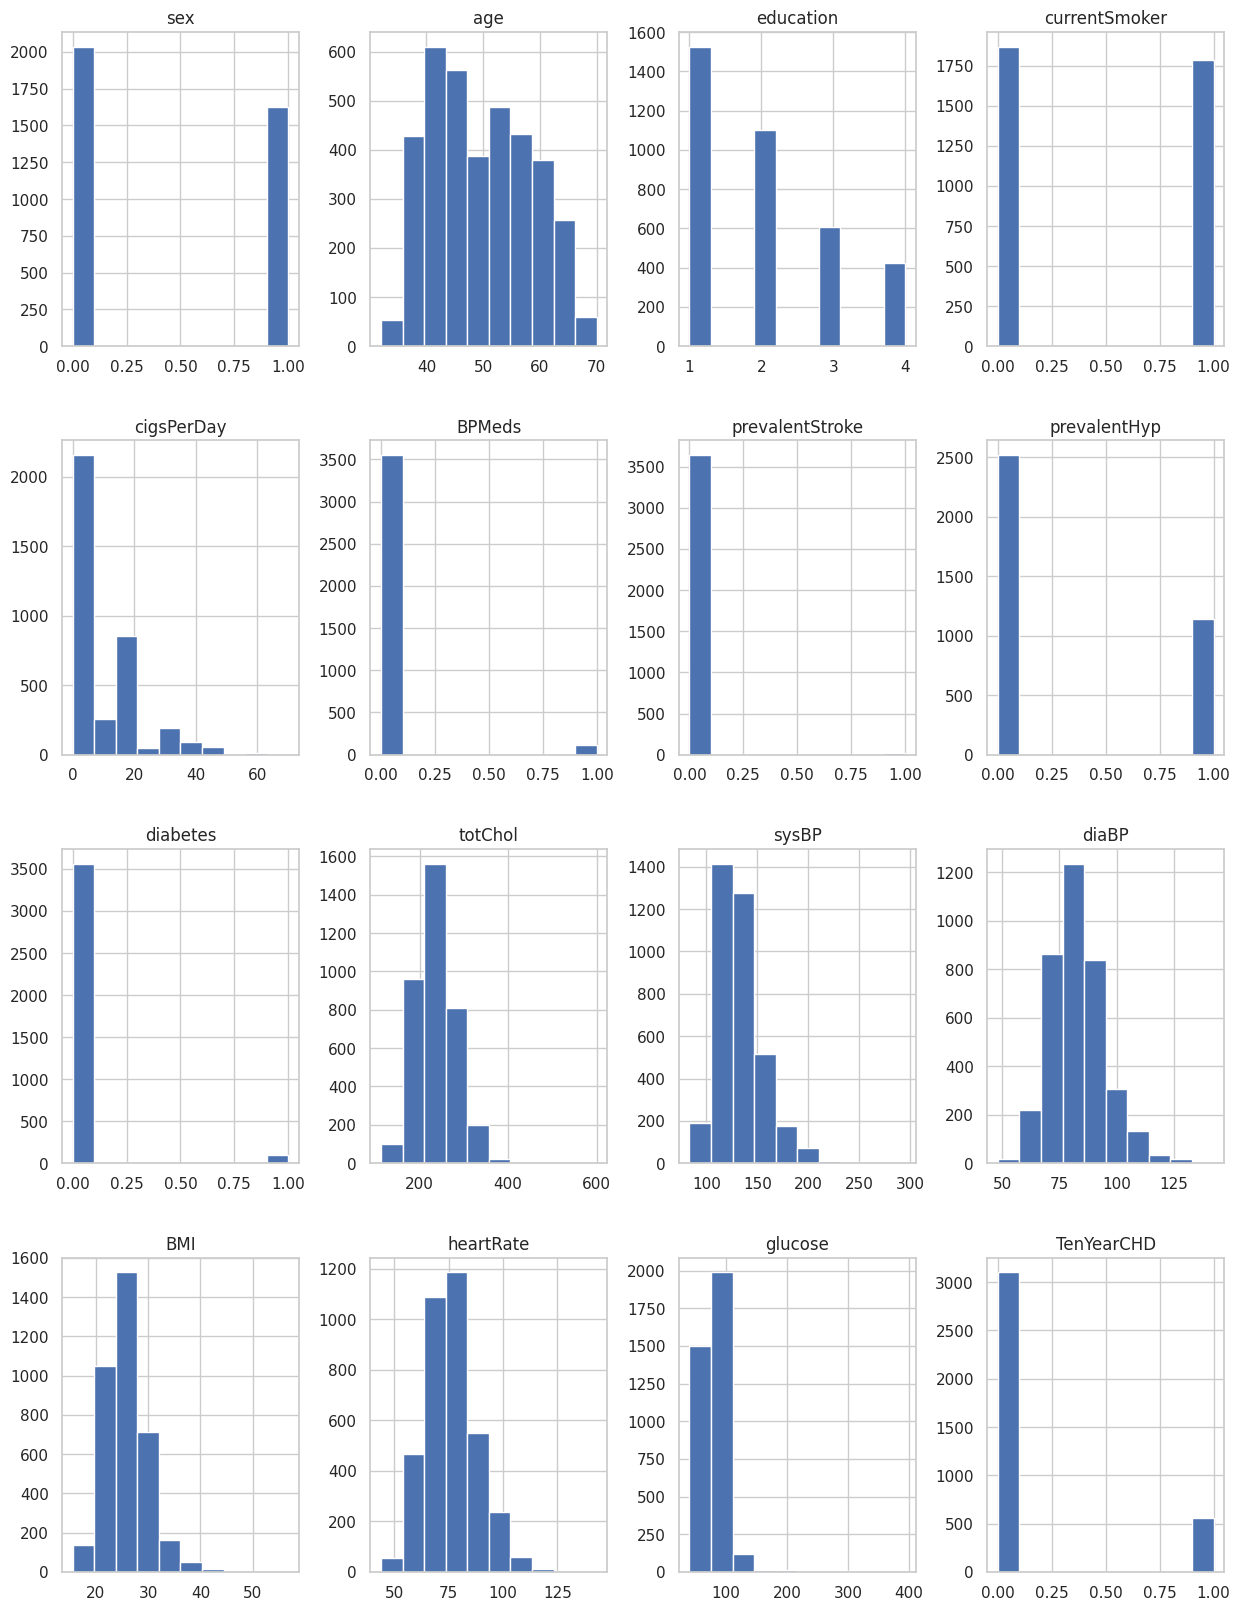

In [ ]:
fig=plt.figure(figsize=(15,20))
ax =fig.gca()
df.hist(ax = ax)
plt.show()

<ipython-input-24-298386eb970b>:7: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


<ipython-input-24-298386eb970b>:7: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


<ipython-input-24-298386eb970b>:7: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use ei

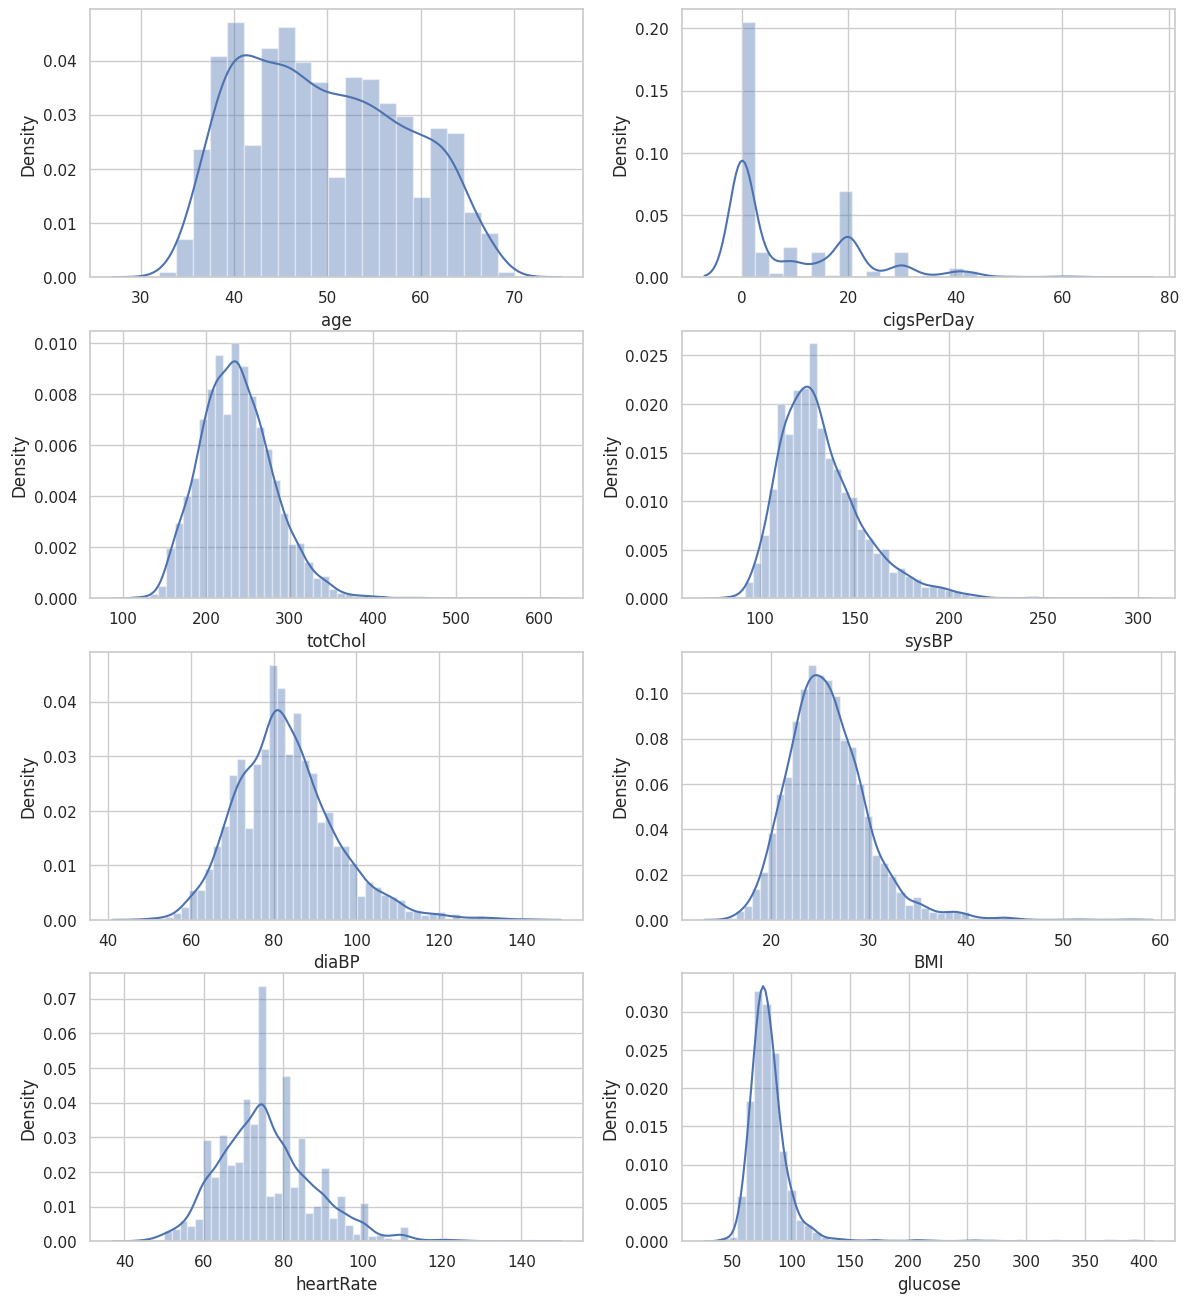

In [ ]:
f, axes = plt.subplots(4, 2, figsize=(14,16))

index1 = 0
index2 = 0

for col in numeric_features:
    sns.distplot(df[col], ax=axes[index1][index2]);
    index2 = index2+1
    if index2==2:
        index2 = 0
        index1 = index1+1
plt.show()

<ipython-input-25-95d41307c9f5>:5: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


<ipython-input-25-95d41307c9f5>:6: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




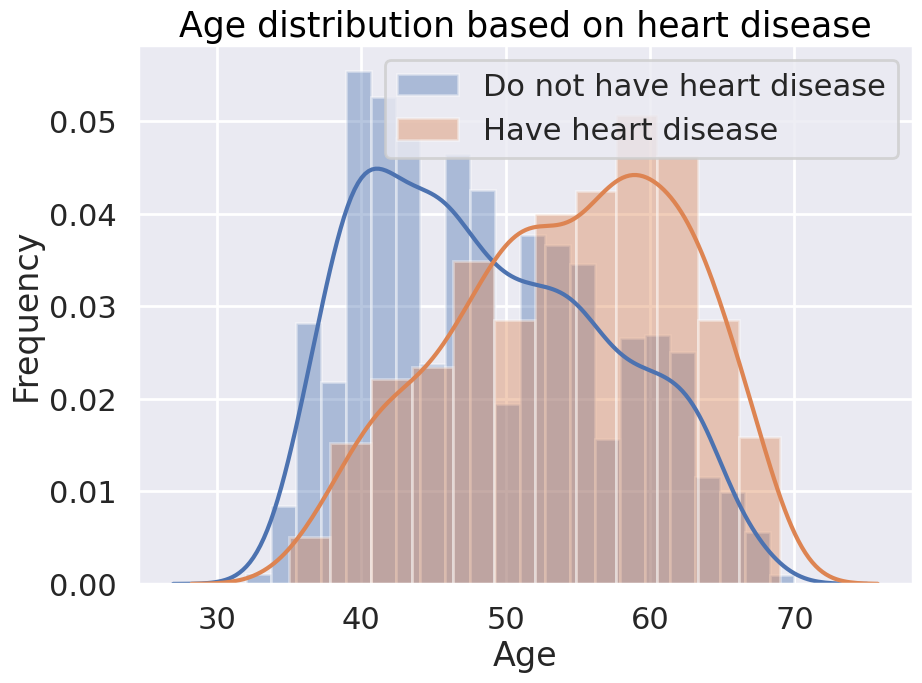

In [ ]:
sns.set_theme(context='poster')
plt.figure(figsize=(10,7))
plt.title('Age distribution based on heart disease', color="Black",fontsize=25)

sns.distplot(df[df['TenYearCHD'] == 0]['age'], label='Do not have heart disease')
sns.distplot(df[df['TenYearCHD'] == 1]['age'], label = 'Have heart disease')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.legend()
plt.show()

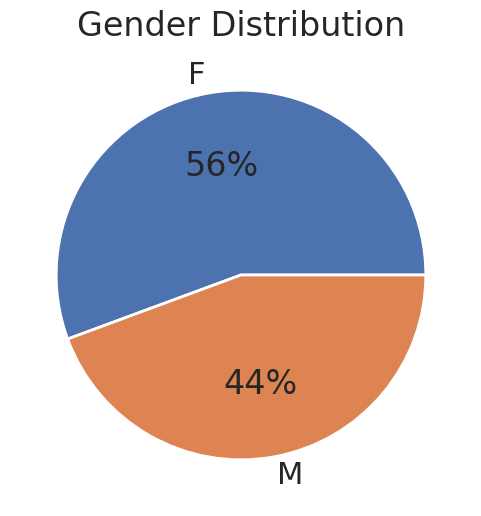

In [ ]:
# list for the sex column
gender = ['F','M']
gender_data = pd.Series(df['sex']).value_counts()

plt.figure(figsize=(6,6))
plt.title('Gender Distribution')
plt.pie(gender_data,labels=gender,autopct='%.0f%%')
plt.show()

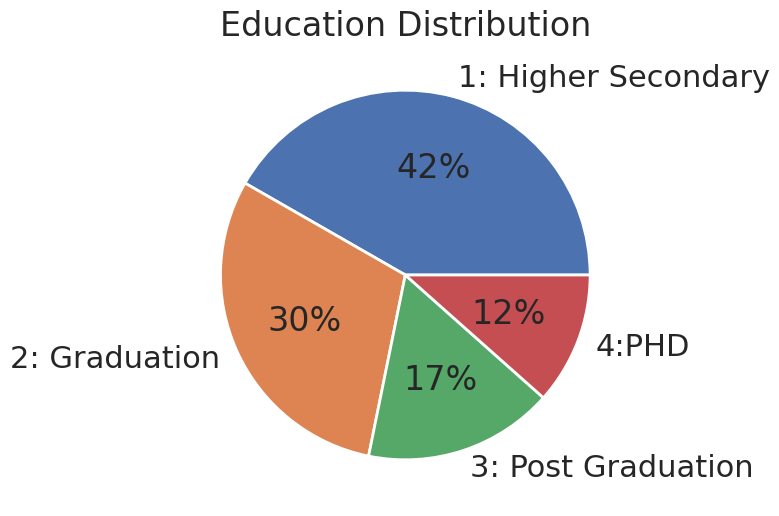

In [ ]:
# list for the chest pain type column
chest_pain = [ '1: Higher Secondary', '2: Graduation',
              '3: Post Graduation','4:PHD']
cp_data = pd.Series(df['education']).value_counts()

plt.figure(figsize=(6,6))
plt.title('Education Distribution')
plt.pie(cp_data,labels=chest_pain,autopct='%.0f%%')
plt.show()

<ipython-input-28-d0761b11ab57>:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




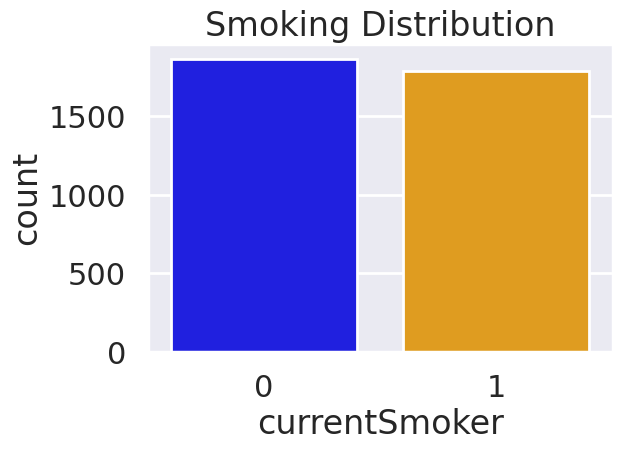

In [ ]:
# count plot for  is_smoking column
plt.figure(figsize=(6,4))
plt.title('Smoking Distribution')
sns.countplot(data=df,x='currentSmoker',palette=["blue","orange"])
plt.show()

###Bivariate Analysis

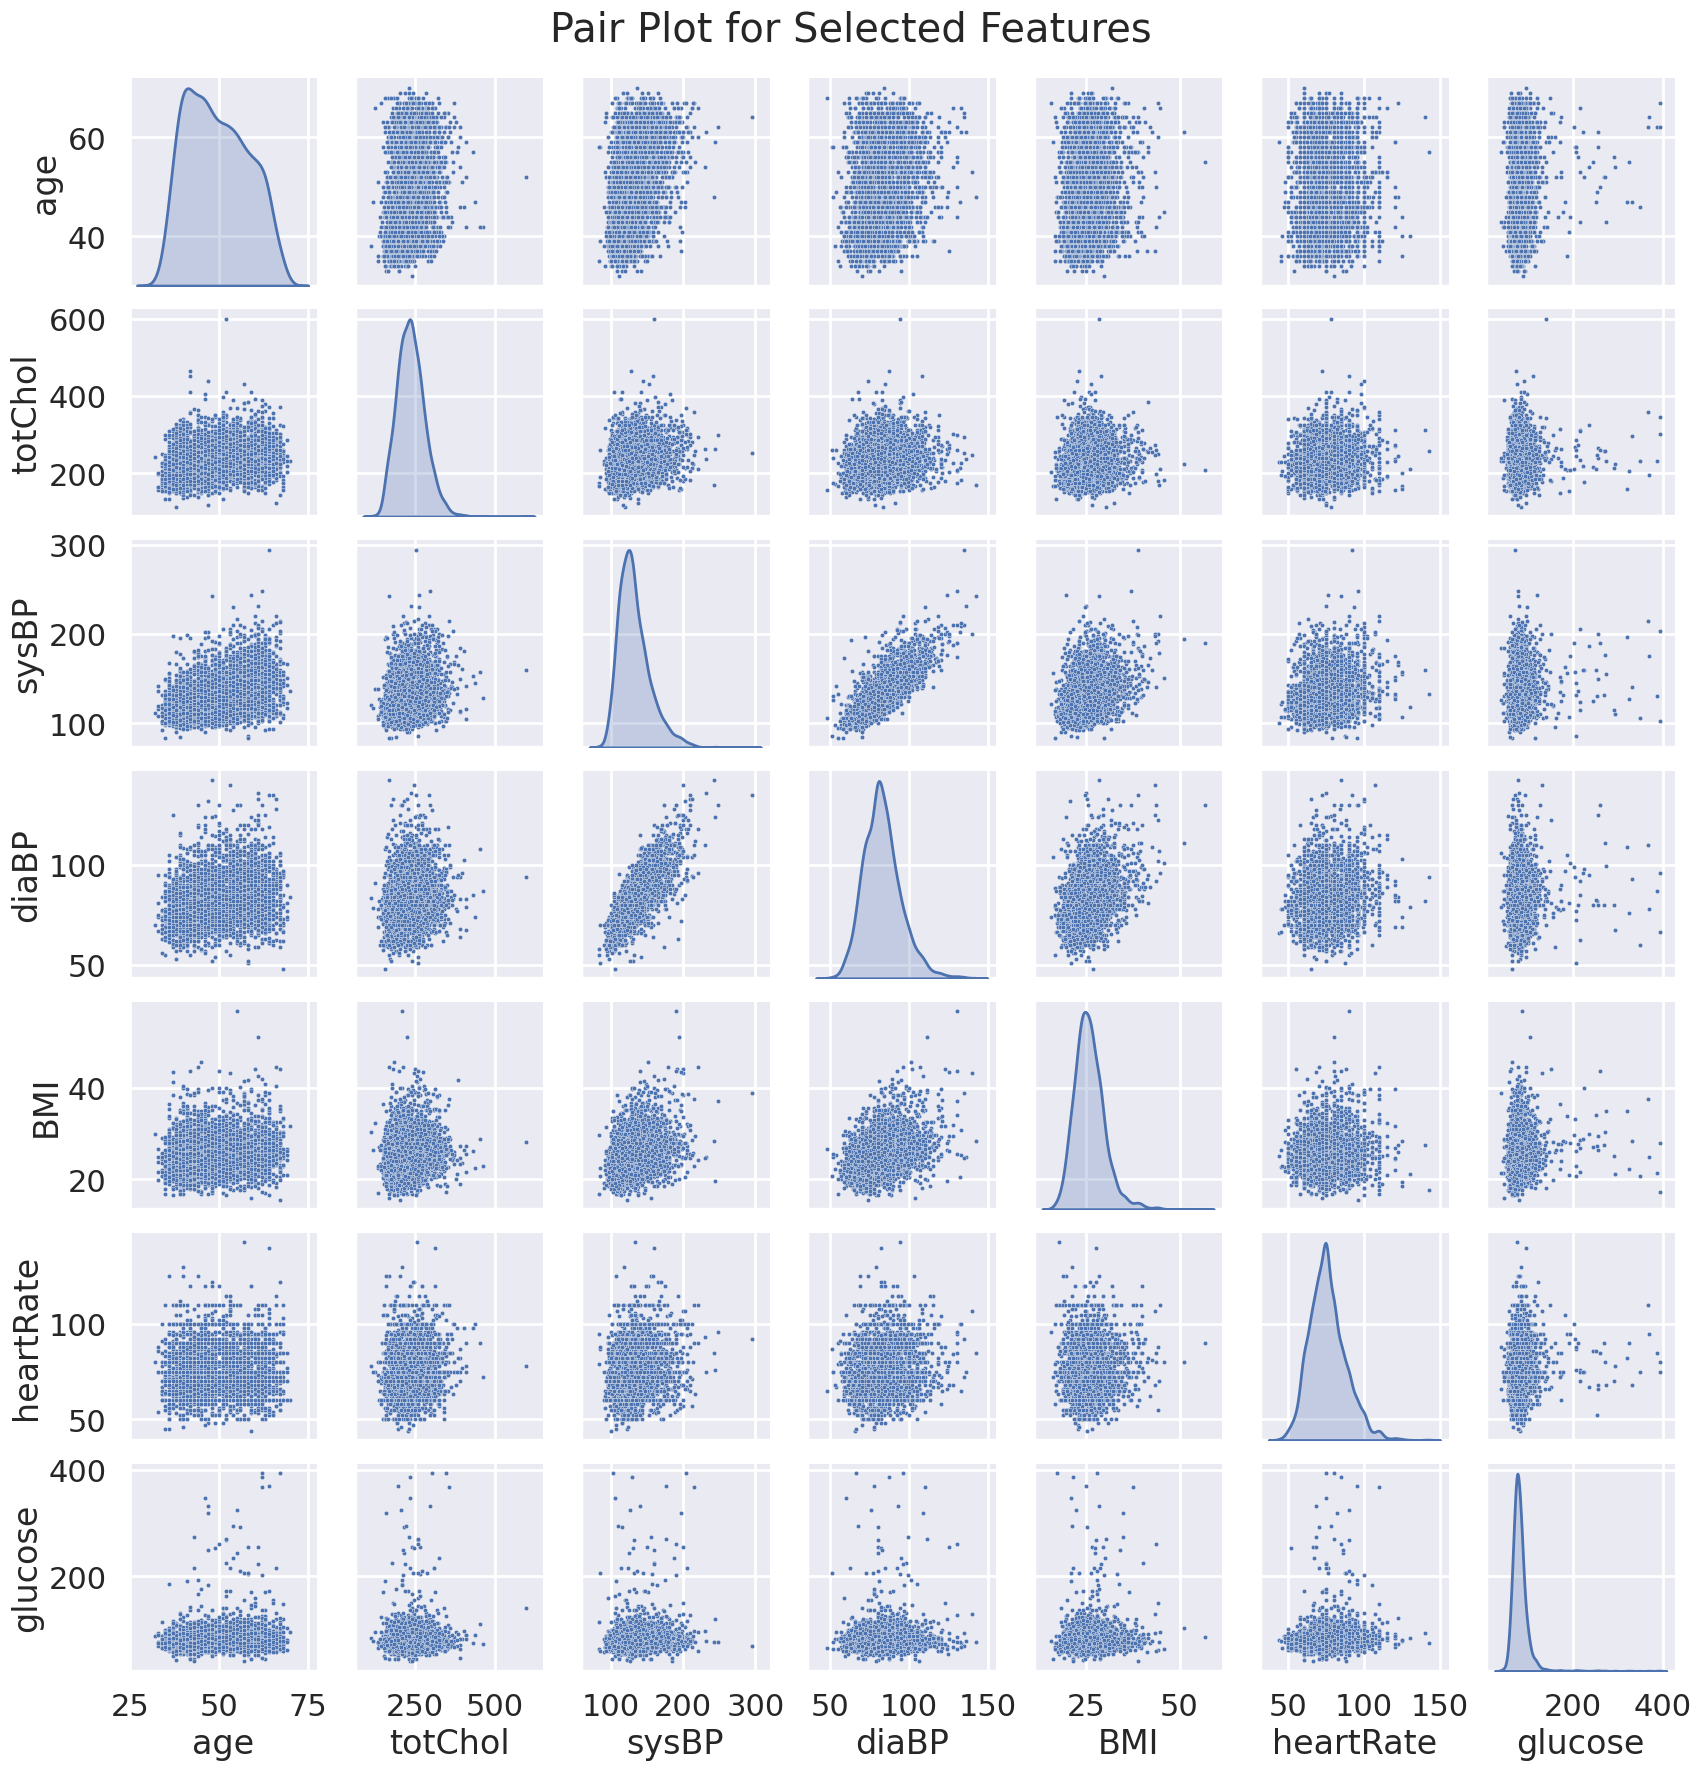

In [ ]:
selected_features = ['age', 'totChol', 'sysBP', 'diaBP','BMI','heartRate','glucose']

#Creating Pair Plot
pair_plot = sns.pairplot(df[selected_features], diag_kind='kde',plot_kws=dict(s=10))
pair_plot.fig.suptitle("Pair Plot for Selected Features", y=1.02)
plt.show()

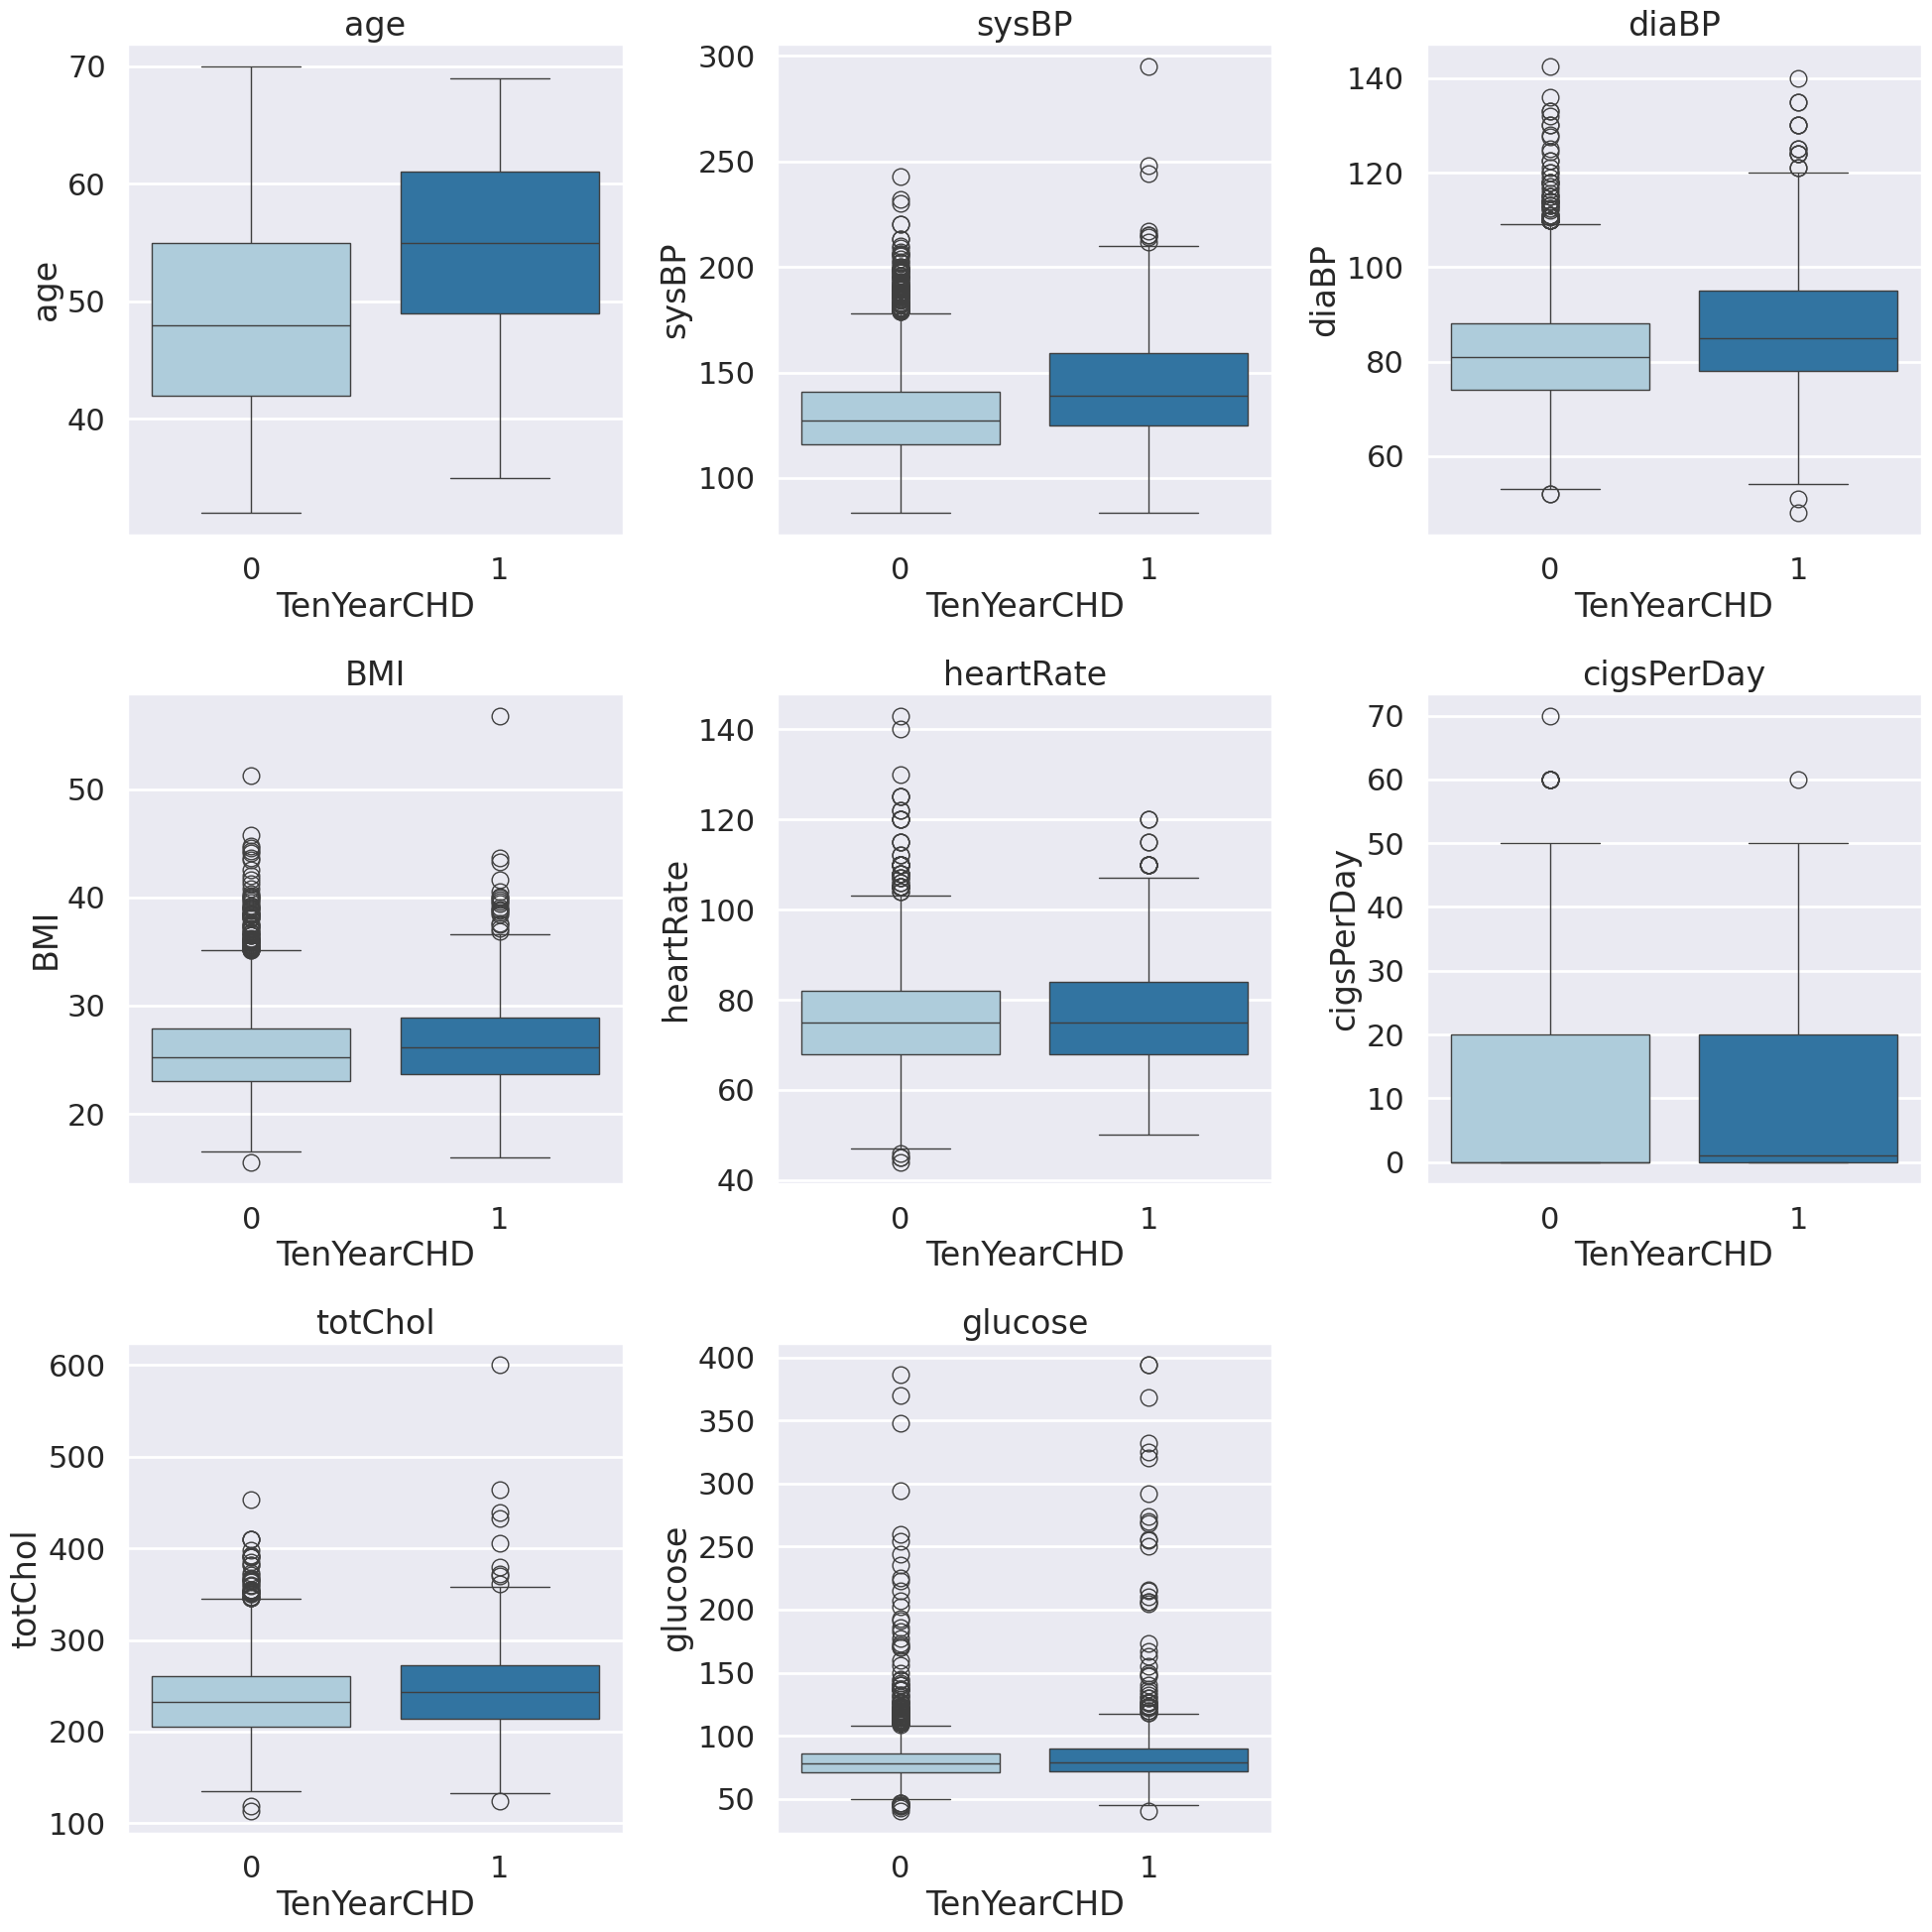

In [ ]:
#Creating Box Plot to understand the distribution and quartiles
plt.figure(figsize=(20,20))
plt.subplot(3,3,1)
sns.boxplot(x=df['TenYearCHD'],y=df['age'], hue = df['TenYearCHD'],palette = "Paired", legend = False)
plt.title('age')

plt.subplot(3,3,2)
sns.boxplot(x=df['TenYearCHD'],y=df['sysBP'], hue = df['TenYearCHD'],palette = "Paired", legend = False)
plt.title('sysBP')

plt.subplot(3,3,3)
sns.boxplot(x=df['TenYearCHD'],y=df['diaBP'], hue = df['TenYearCHD'],palette = "Paired", legend = False)
plt.title('diaBP')

plt.subplot(3,3,4)
sns.boxplot(x=df['TenYearCHD'],y=df['BMI'], hue = df['TenYearCHD'],palette = "Paired", legend = False)
plt.title('BMI')

plt.subplot(3,3,5)
sns.boxplot(x=df['TenYearCHD'],y=df['heartRate'], hue = df['TenYearCHD'],palette = "Paired", legend = False)
plt.title('heartRate')

plt.subplot(3,3,6)
sns.boxplot(x=df['TenYearCHD'],y=df['cigsPerDay'], hue = df['TenYearCHD'],palette = "Paired", legend = False)
plt.title('cigsPerDay')

plt.subplot(3,3,7)
sns.boxplot(x=df['TenYearCHD'],y=df['totChol'], hue = df['TenYearCHD'],palette = "Paired", legend = False)
plt.title('totChol')

plt.subplot(3,3,8)
sns.boxplot(x=df['TenYearCHD'],y=df['glucose'], hue = df['TenYearCHD'],palette = "Paired", legend = False)
plt.title('glucose')

plt.tight_layout()

<Figure size 2000x2000 with 0 Axes>

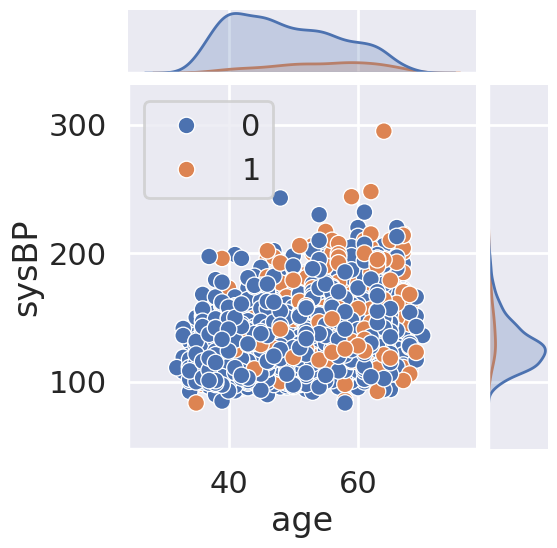

In [ ]:
# jointplot for 'Age' vs 'sysBP'
plt.figure(figsize=(20,20))
sns.jointplot(data=df,x='age',y='sysBP',hue='TenYearCHD')
plt.legend()

<Figure size 2000x2000 with 0 Axes>

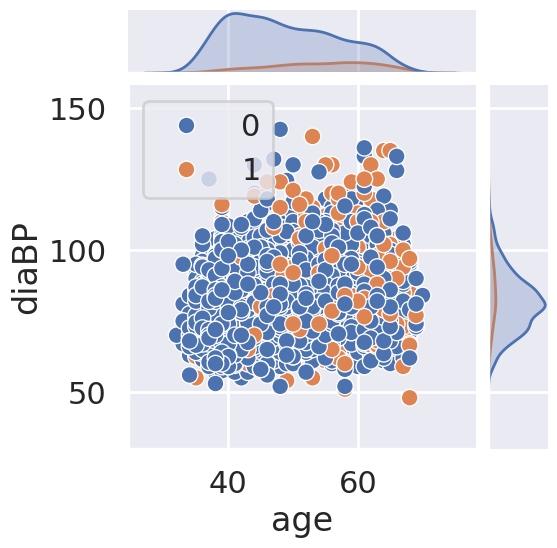

In [ ]:
# jointplot for 'Age' vs 'diaBP'
plt.figure(figsize=(20,20))
sns.jointplot(data=df,x='age',y='diaBP',hue='TenYearCHD')
plt.legend()

<Figure size 2000x2000 with 0 Axes>

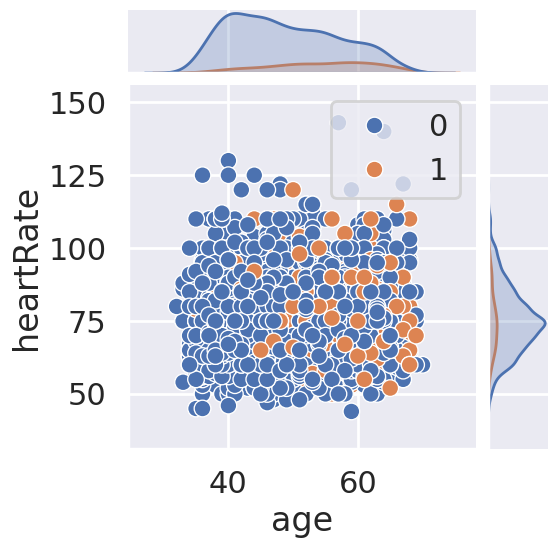

In [ ]:
# jointplot for 'Age' vs 'heartRate'
plt.figure(figsize=(20,20))
sns.jointplot(data=df,x='age',y='heartRate',hue='TenYearCHD')
plt.legend()

<Figure size 2000x2000 with 0 Axes>

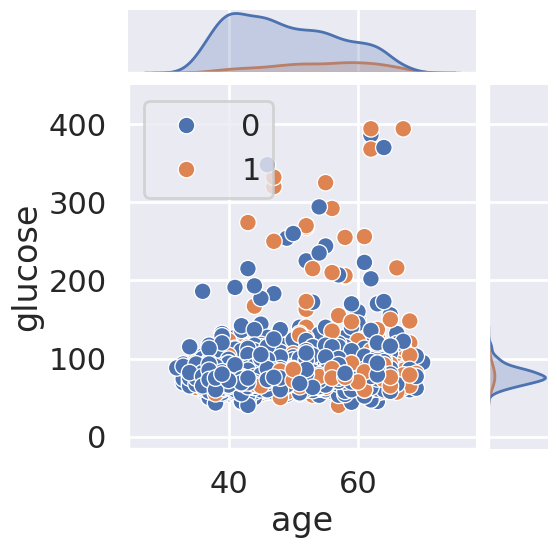

In [ ]:
# jointplot for 'Age' vs 'glucose'
plt.figure(figsize=(20,20))
sns.jointplot(data=df,x='age',y='glucose',hue='TenYearCHD')
plt.legend()

<Figure size 2000x2000 with 0 Axes>

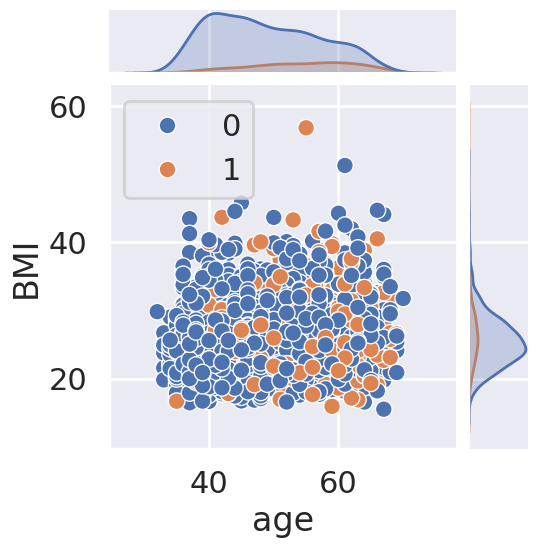

In [ ]:
# jointplot for 'Age' vs 'BMI'
plt.figure(figsize=(20,20))
sns.jointplot(data=df,x='age',y='BMI',hue='TenYearCHD')
plt.legend()

In [ ]:
from operator import add

def stacked_barchart(df, title=None, ylabel=None, xlabel=None):
    default_colors = ['#008080', '#5f3c41', '#219AD8']
    # From raw value to percentage
    totals = df.sum(axis=1)
    bars = ((df.T / totals) * 100).T
    r = list(range(df.index.size))

    # Plot
    barWidth = 0.95
    names = df.index.tolist()
    bottom = [0] * bars.shape[0]

    # Create bars
    color_index = 0
    plots = []
    for bar in bars.columns:
        plots.append(plt.bar(r, bars[bar], bottom=bottom, color=default_colors[color_index], edgecolor='white', width=barWidth))
        bottom = list(map(add, bottom, bars[bar]))
        color_index = 0 if color_index >= len(default_colors) else color_index + 1

    # Custom x axis
    plt.title(title)
    plt.xticks(r, names)
    plt.xlabel(df.index.name if xlabel is None else xlabel)
    plt.ylabel(df.columns.name if ylabel is None else ylabel)
    ax = plt.gca()

    y_labels = ax.get_yticks()
    ax.set_yticklabels([str(y) + '%' for y in y_labels])

    flat_list = [item for sublist in df.T.values for item in sublist]
    for i, d in zip(ax.patches, flat_list):
        data_label = str(d) + " (" + str(round(i.get_height(), 2)) + "%)"
        ax.text(i.get_x() + 0.45, i.get_y() + 5, data_label, horizontalalignment='center', verticalalignment='center', fontdict=dict(color='white', size=20))

    for item in ([ax.title]):
        item.set_fontsize(27)

    for item in ([ax.xaxis.label, ax.yaxis.label] + ax.get_xticklabels() + ax.get_yticklabels()):
        item.set_fontsize(24)

    legend = ax.legend(plots, df.columns.tolist(), fancybox=True)
    plt.setp(legend.get_texts(), fontsize='20')

<ipython-input-36-ee9a5e1e181f>:31: UserWarning:

FixedFormatter should only be used together with FixedLocator

<ipython-input-36-ee9a5e1e181f>:31: UserWarning:

FixedFormatter should only be used together with FixedLocator

<ipython-input-36-ee9a5e1e181f>:31: UserWarning:

FixedFormatter should only be used together with FixedLocator

<ipython-input-36-ee9a5e1e181f>:31: UserWarning:

FixedFormatter should only be used together with FixedLocator

<ipython-input-36-ee9a5e1e181f>:31: UserWarning:

FixedFormatter should only be used together with FixedLocator



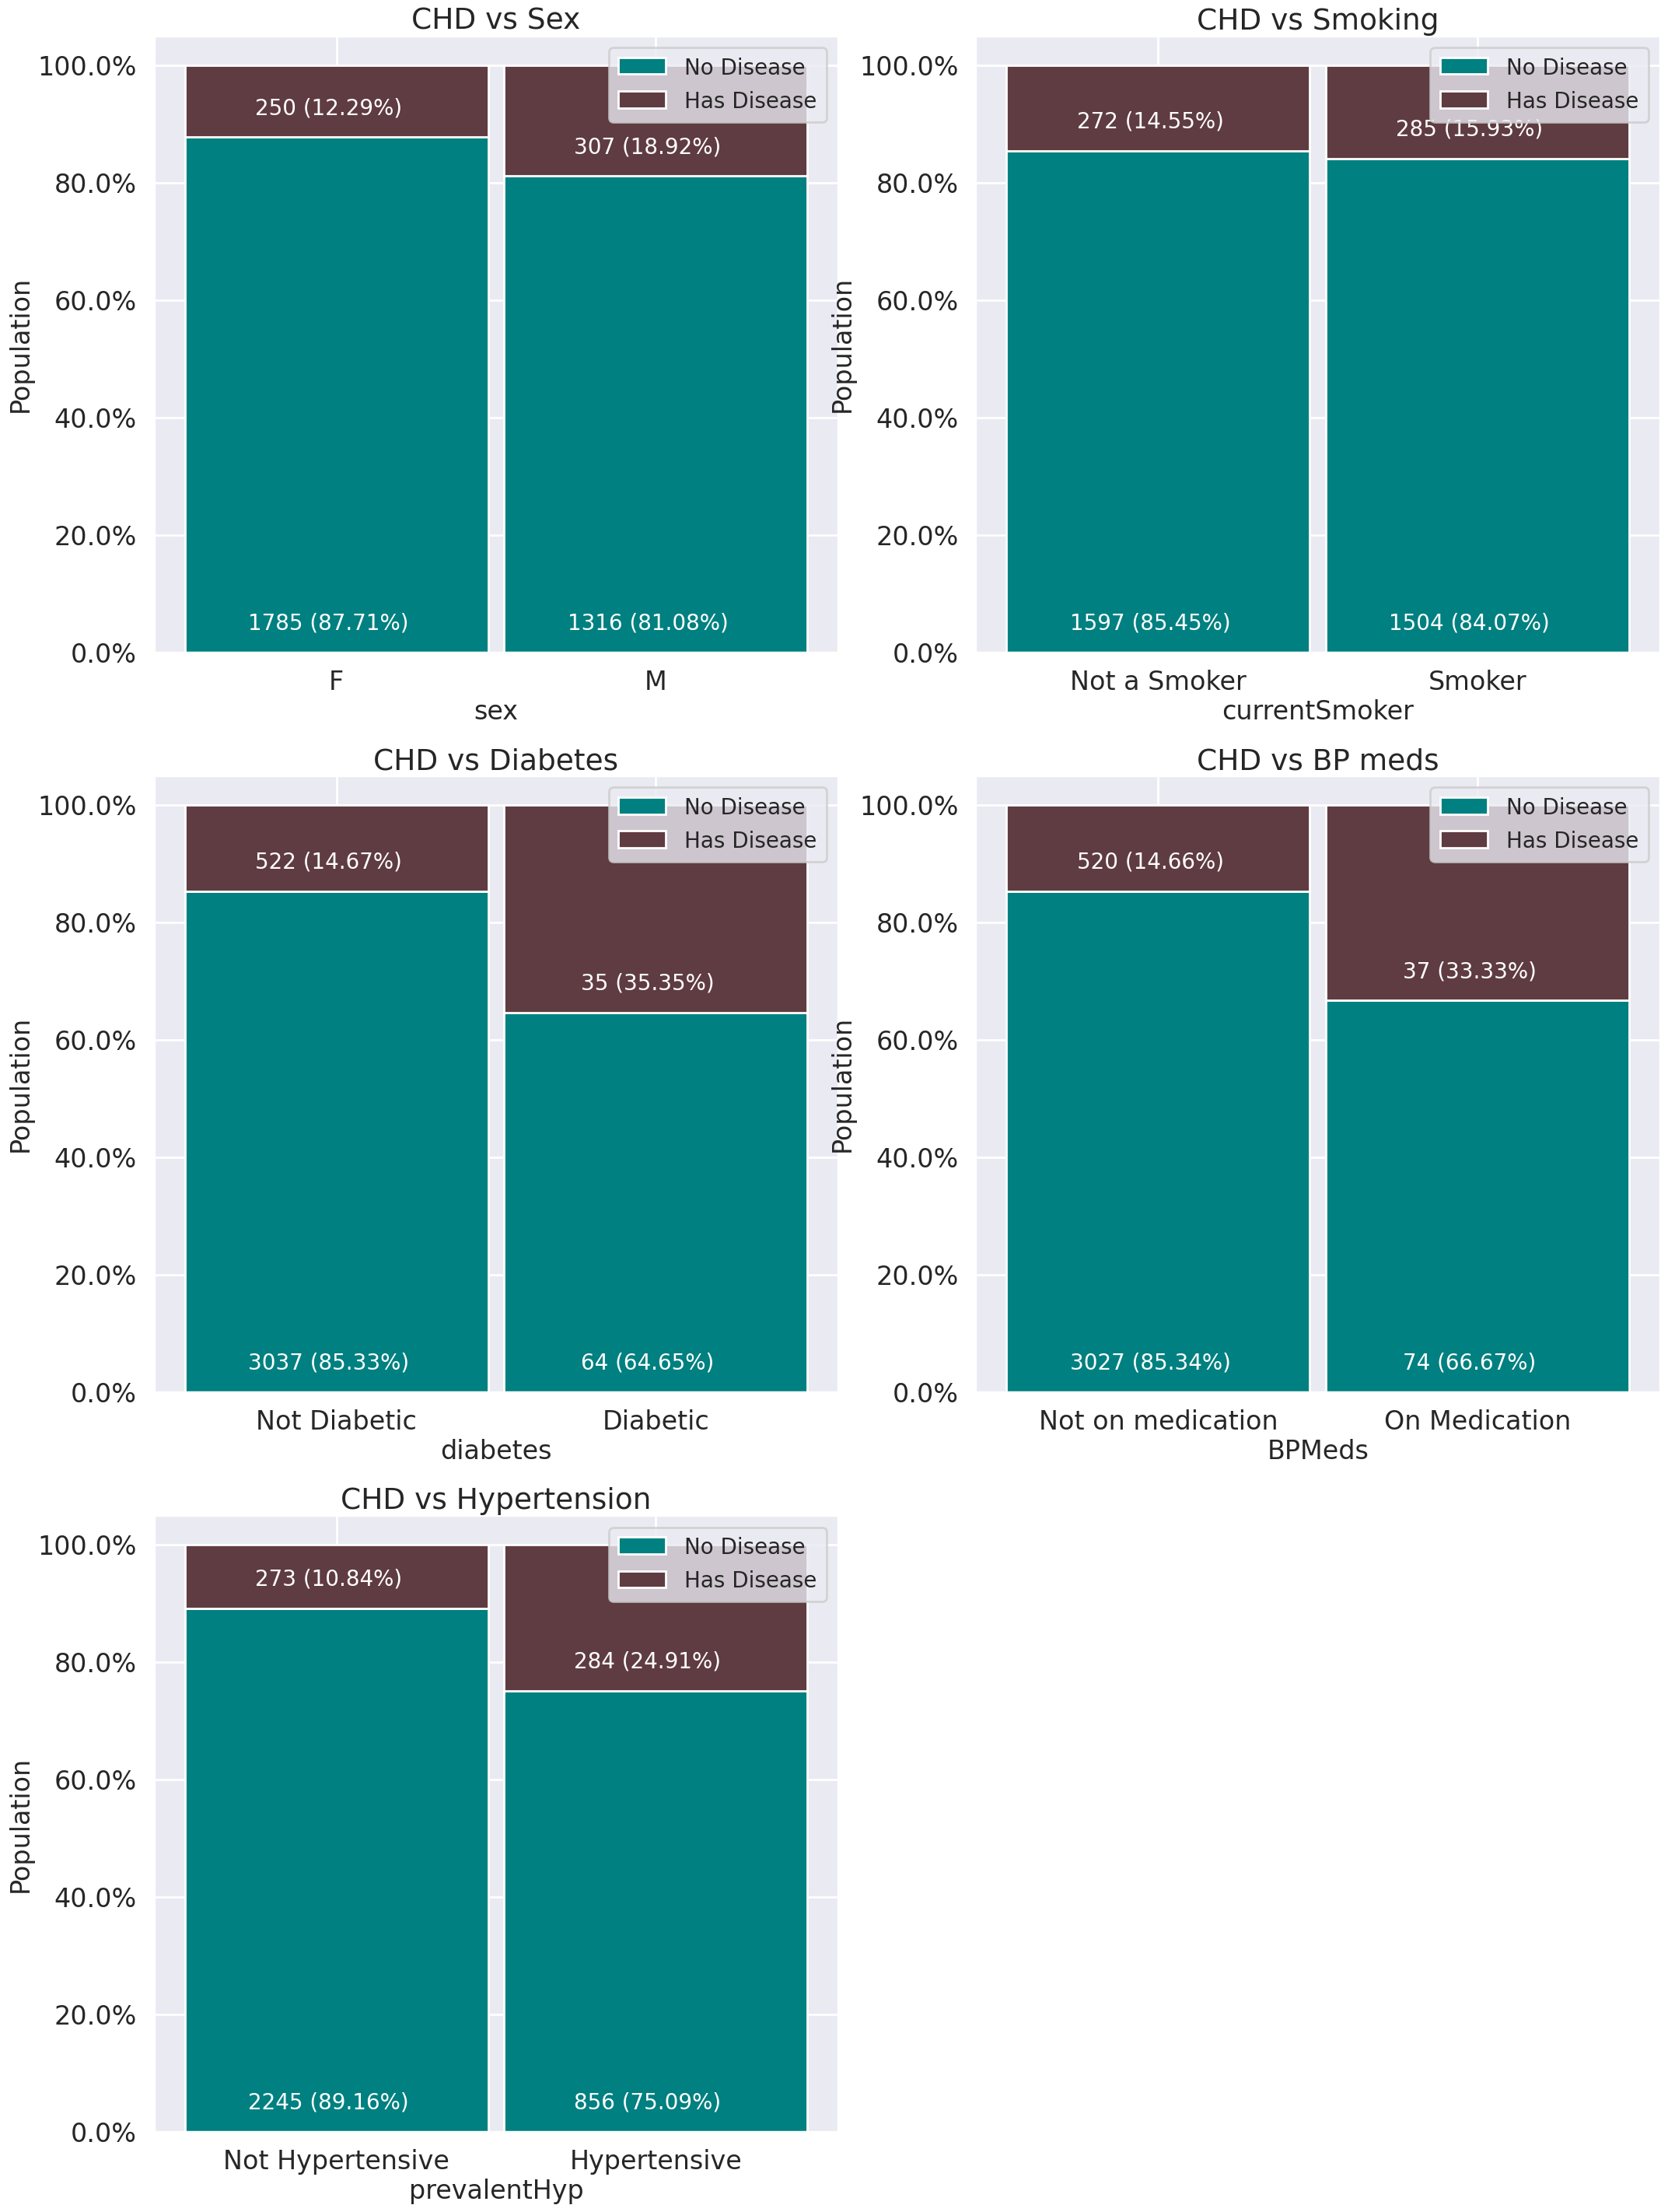

In [ ]:
fig = plt.gcf()
fig.set_size_inches(25, 35)
grid_rows = 3
grid_cols = 2

# sex vs CHD outcome
plt.subplot(grid_rows, grid_cols, 1)
temp = df[['sex', 'TenYearCHD']].groupby(['sex', 'TenYearCHD']).size().unstack('TenYearCHD')
temp.rename(index={0: 'F', 1: 'M'}, columns={0: 'No Disease', 1: 'Has Disease'}, inplace=True)
stacked_barchart(temp, title='CHD vs Sex', ylabel='Population')

# smoking status vs CHD outcome
plt.subplot(grid_rows, grid_cols, 2)
temp = df[["currentSmoker", 'TenYearCHD']].groupby(['currentSmoker', 'TenYearCHD']).size().unstack('TenYearCHD')
temp.rename(index={0: 'Not a Smoker', 1: 'Smoker'}, columns={0: 'No Disease', 1: 'Has Disease'}, inplace=True)
stacked_barchart(temp, title='CHD vs Smoking', ylabel='Population')

# diabetes vs CHD outcome
plt.subplot(grid_rows, grid_cols, 3)
temp = df[['diabetes', 'TenYearCHD']].groupby(['diabetes', 'TenYearCHD']).size().unstack('TenYearCHD')
temp.rename(index={0: 'Not Diabetic', 1: 'Diabetic'}, columns={0: 'No Disease', 1: 'Has Disease'}, inplace=True)
stacked_barchart(temp, title='CHD vs Diabetes', ylabel='Population')

# BP meds vs CHD outcome
plt.subplot(grid_rows, grid_cols, 4)
temp = df[['BPMeds', 'TenYearCHD']].groupby(['BPMeds', 'TenYearCHD']).size().unstack('TenYearCHD')
temp.rename(index={0: 'Not on medication', 1: 'On Medication'}, columns={0: 'No Disease', 1: 'Has Disease'}, inplace=True)
stacked_barchart(temp, title='CHD vs BP meds', ylabel='Population')

# Hypertension vs CHD outcome
plt.subplot(grid_rows, grid_cols, 5)
temp = df[['prevalentHyp', 'TenYearCHD']].groupby(['prevalentHyp', 'TenYearCHD']).size().unstack('TenYearCHD')
temp.rename(index={0: 'Not Hypertensive', 1: 'Hypertensive'}, columns={0: 'No Disease', 1: 'Has Disease'}, inplace=True)
stacked_barchart(temp, title='CHD vs Hypertension', ylabel='Population')

plt.show()

###Multivariate Analysis

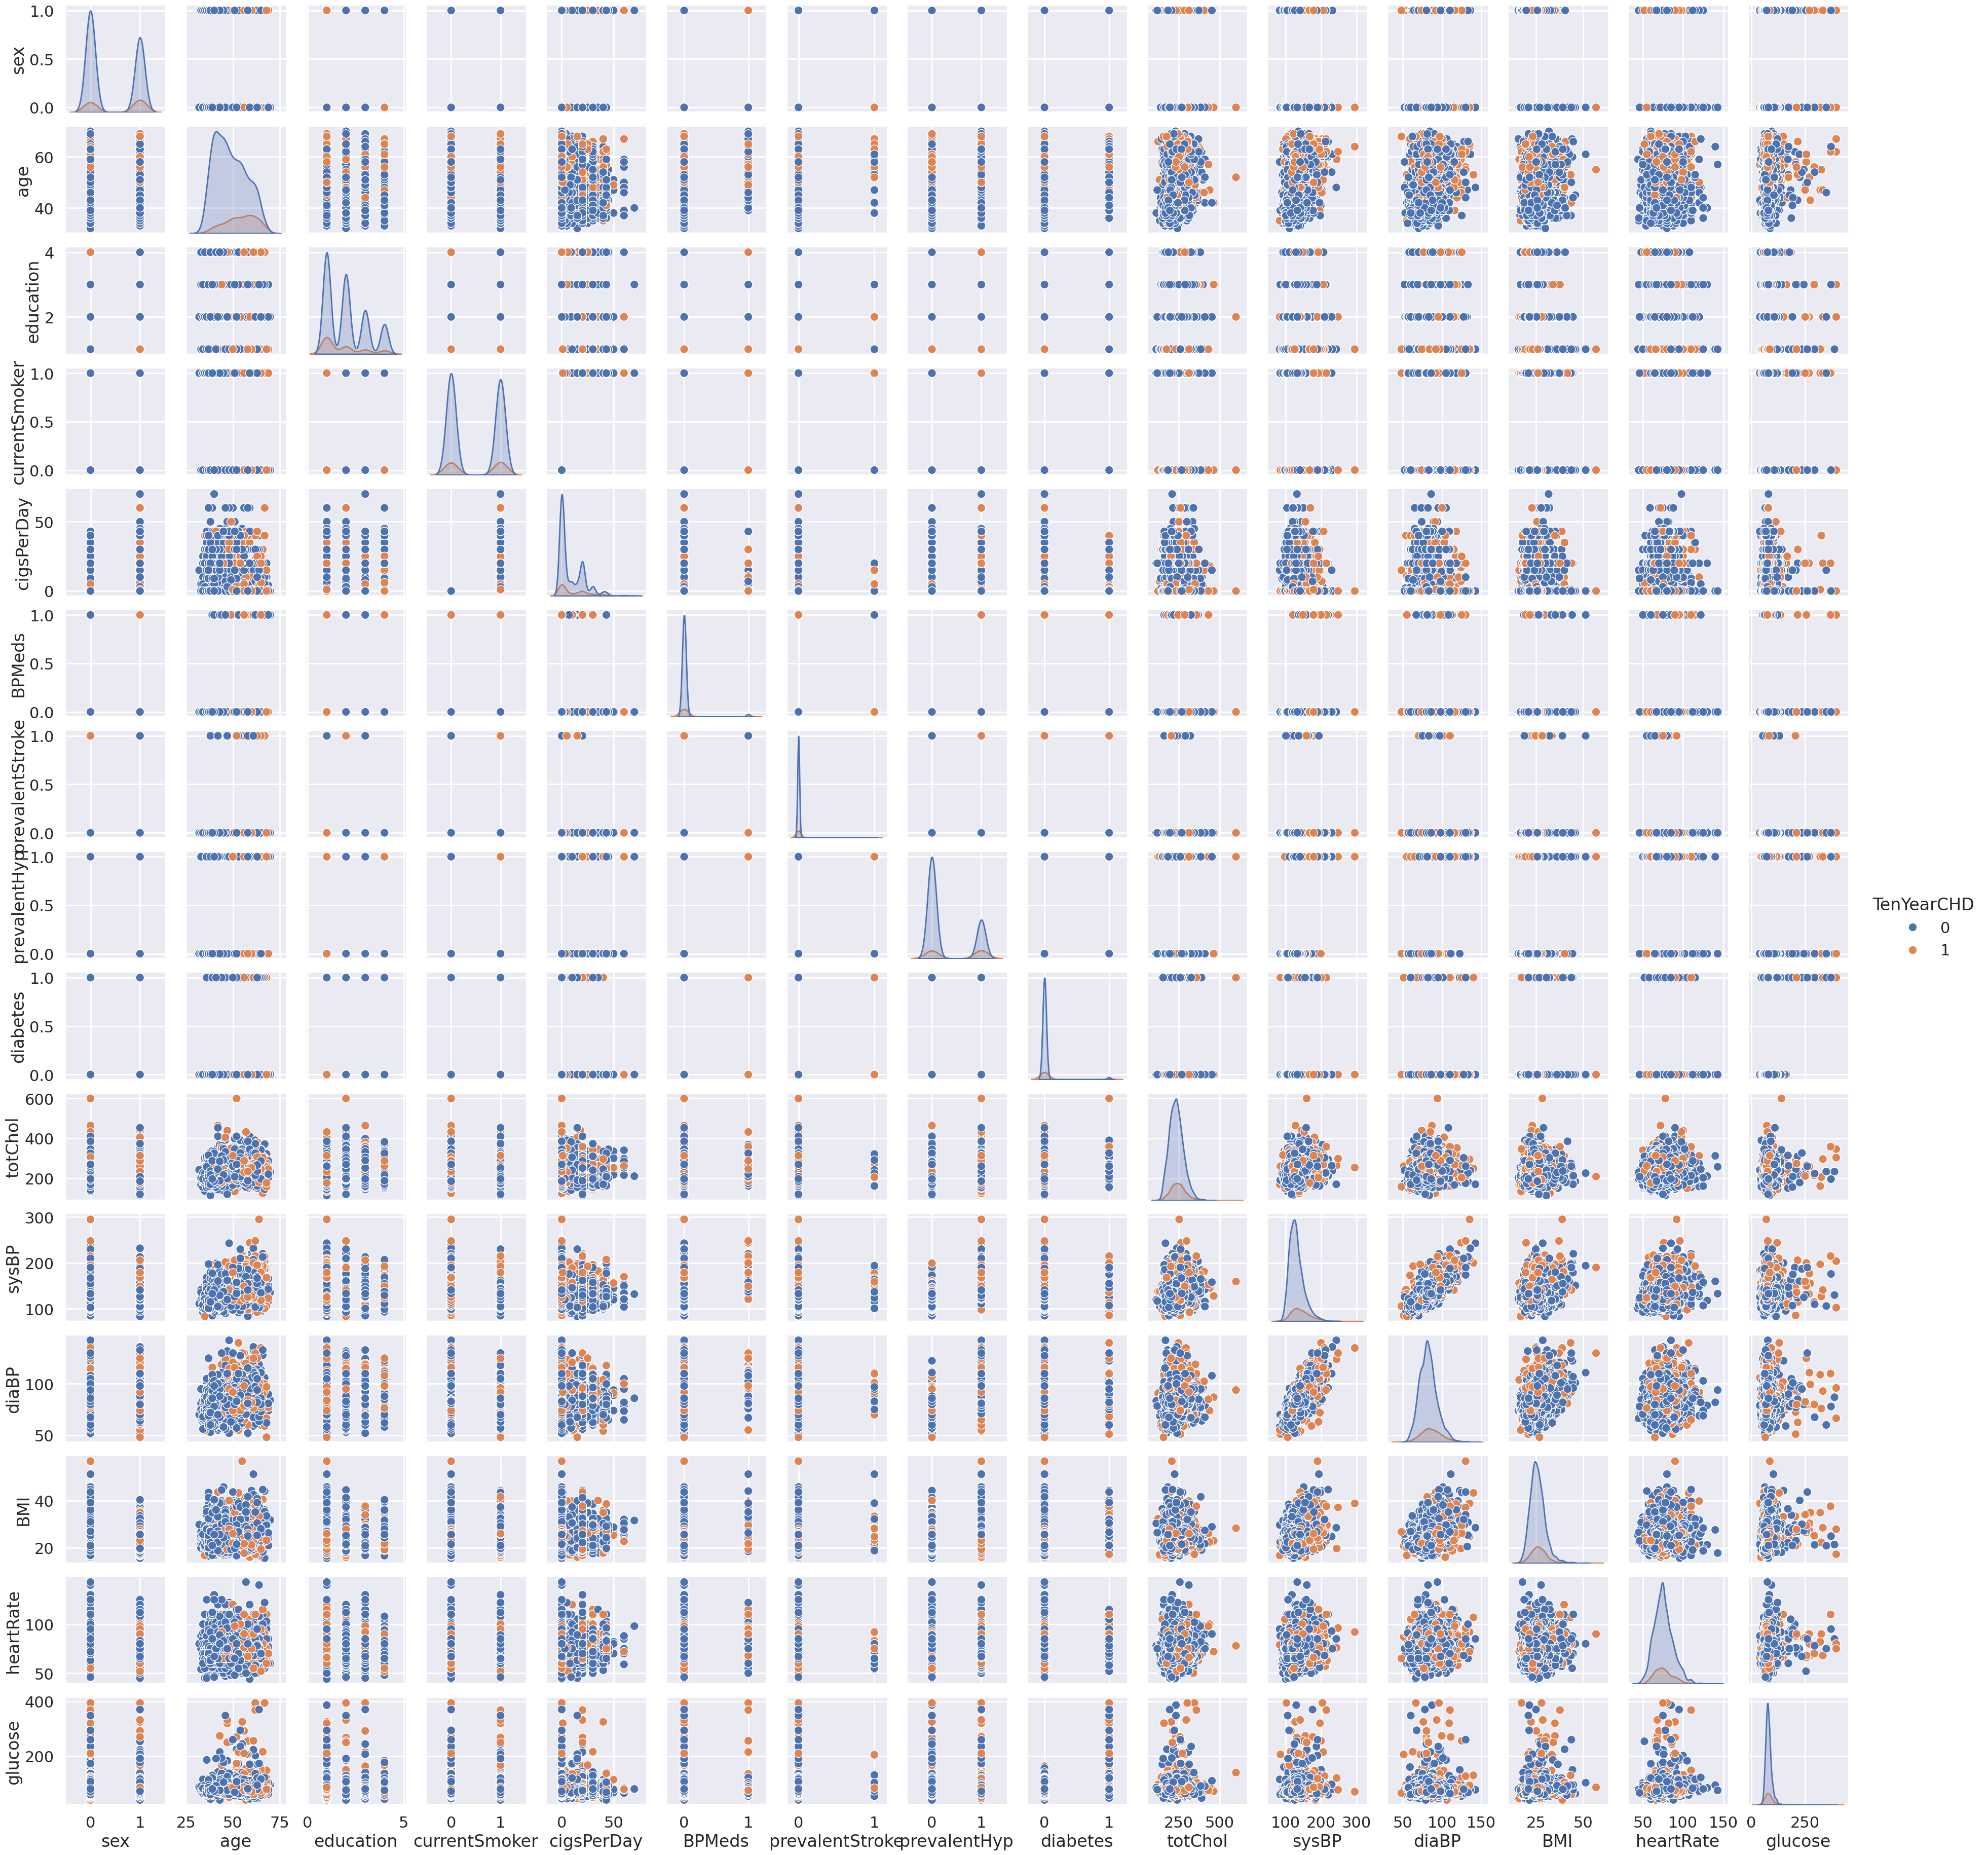

In [ ]:
sns.pairplot(df,hue='TenYearCHD')

###Stats of every features

In [ ]:
df.describe()

sex          age    education  currentSmoker   cigsPerDay  \
count  3658.000000  3658.000000  3658.000000    3658.000000  3658.000000   
mean      0.443685    49.551941     1.980317       0.489065     9.025424   
std       0.496886     8.562029     1.022656       0.499949    11.921590   
min       0.000000    32.000000     1.000000       0.000000     0.000000   
25%       0.000000    42.000000     1.000000       0.000000     0.000000   
50%       0.000000    49.000000     2.000000       0.000000     0.000000   
75%       1.000000    56.000000     3.000000       1.000000    20.000000   
max       1.000000    70.000000     4.000000       1.000000    70.000000   

            BPMeds  prevalentStroke  prevalentHyp     diabetes      totChol  \
count  3658.000000      3658.000000   3658.000000  3658.000000  3658.000000   
mean      0.030344         0.005741      0.311646     0.027064   236.847731   
std       0.171557         0.075561      0.463229     0.162292    44.097681   
min       0.000000         0.000000      0.000000     0.000000   113.000000   
25%       0.000000         0.000000      0.000000     0.000000   206.000000   
50%       0.000000         0.000000      0.000000     0.000000   234.000000   
75%       0.000000         0.000000      1.000000     0.000000   263.000000   
max       1.000000         1.000000      1.000000     1.000000   600.000000   

             sysBP        diaBP          BMI    heartRate      glucose  \
count  3658.000000  3658.000000  3658.000000  3658.000000  3658.000000   
mean    132.370558    82.917031    25.782802    75.730727    81.852925   
std      22.086866    11.974258     4.065601    11.981525    23.904164   
min      83.500000    48.000000    15.540000    44.000000    40.000000   
25%     117.000000    75.000000    23.080000    68.000000    71.000000   
50%     128.000000    82.000000    25.380000    75.000000    78.000000   
75%     143.875000    90.000000    28.037500    82.000000    87.000000   
max     295.000000   142.500000    56.800000   143.000000   394.000000   

        TenYearCHD  
count  3658.000000  
mean      0.152269  
std       0.359331  
min       0.000000  
25%       0.000000  
50%       0.000000  
75%       0.000000  
max       1.000000

###Checking Target Variable

In [ ]:
df["TenYearCHD"].value_counts(normalize=True)

TenYearCHD
0    0.847731
1    0.152269
Name: proportion, dtype: float64

15% of the dataset will develop heart disease in next 10 years

##Hypothesis Testing

In [ ]:
import scipy.stats as st

In [ ]:
st.norm.interval(confidence=0.95,loc=np.mean(df['age']),scale=st.sem(df['age']))

(49.27447930494794, 49.829402597731125)

Q-Q(quantile-quantile) plot is also used to check the normal distribution

In [ ]:
from statsmodels.graphics.gofplots import qqplot

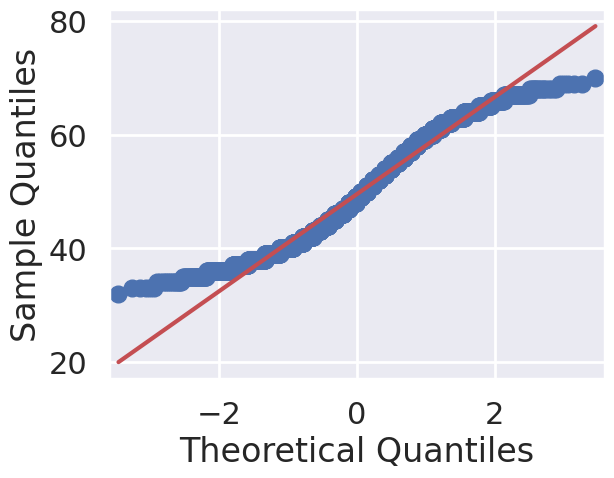

In [ ]:
qqplot(df['age'],line="s")
plt.show()

<Axes: xlabel='age', ylabel='Count'>

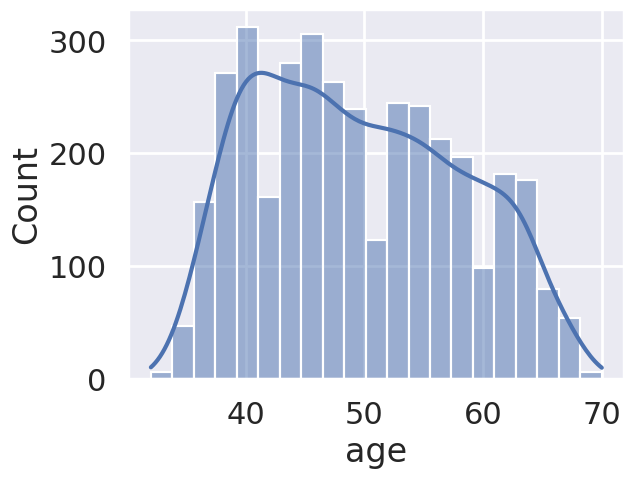

In [ ]:
sns.histplot(x=df["age"],kde=True)

In [ ]:
st.shapiro(df.age)

ShapiroResult(statistic=0.9664644205443391, pvalue=2.192835490035828e-28)

P value is less than 0.05 we are able to reject the null hypothesis

H0: The age column is  normally distributed

H1 : The age column is not normally distributed

In this case, we are accepting the alternative hypothesis.

###Mann-Whitney U test

The Mann-Whitney U test is a non-parametric statistical test used to determine whether there is a significant difference between two independent groups in a non-normally distributed data set.

In [ ]:
import scipy.stats as stats

# Perform the Mann-Whitney U test
statistic, p_value = stats.mannwhitneyu(df['sysBP'],df['diaBP'], alternative='two-sided')

# Display the test statistic and p-value
print("Mann-Whitney U Statistic:", statistic)
print("P-value:", p_value)

# Determine significance
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference between the two Features.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference between the two Features.")

Mann-Whitney U Statistic: 13227508.0
P-value: 0.0
Reject the null hypothesis: There is a significant difference between the two Features.


###Encoding

In [ ]:
df.head()

sex  age  education  currentSmoker  cigsPerDay  BPMeds  prevalentStroke  \
0    1   39        4.0              0         0.0     0.0                0   
1    0   46        2.0              0         0.0     0.0                0   
2    1   48        1.0              1        20.0     0.0                0   
3    0   61        3.0              1        30.0     0.0                0   
4    0   46        3.0              1        23.0     0.0                0   

   prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  \
0             0         0    195.0  106.0   70.0  26.97       80.0     77.0   
1             0         0    250.0  121.0   81.0  28.73       95.0     76.0   
2             0         0    245.0  127.5   80.0  25.34       75.0     70.0   
3             1         0    225.0  150.0   95.0  28.58       65.0    103.0   
4             0         0    285.0  130.0   84.0  23.10       85.0     85.0   

   TenYearCHD  
0           0  
1           0  
2           0  
3           1  
4           0

In [ ]:
df.columns

Index(['sex', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

##Feature Selection using Chi Square

In [ ]:
categorical_features=df[['sex','currentSmoker','BPMeds','prevalentStroke','prevalentHyp','diabetes']]

In [ ]:
categorical_features

sex  currentSmoker  BPMeds  prevalentStroke  prevalentHyp  diabetes
0       1              0     0.0                0             0         0
1       0              0     0.0                0             0         0
2       1              1     0.0                0             0         0
3       0              1     0.0                0             1         0
4       0              1     0.0                0             0         0
...   ...            ...     ...              ...           ...       ...
4233    1              1     0.0                0             1         0
4234    1              1     0.0                0             0         0
4237    0              0     0.0                0             0         0
4238    1              0     0.0                0             1         0
4239    0              1     0.0                0             0         0

[3658 rows x 6 columns]

In [ ]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model=ExtraTreesClassifier()
model.fit(X,y)

ExtraTreesClassifier()

In [ ]:
print(model.feature_importances_)

[0.01916475 0.129013   0.05091488 0.01611159 0.05252032 0.00927596
 0.00539443 0.02683265 0.00951973 0.11034275 0.12465846 0.11578433
 0.11239069 0.10209345 0.11598301]


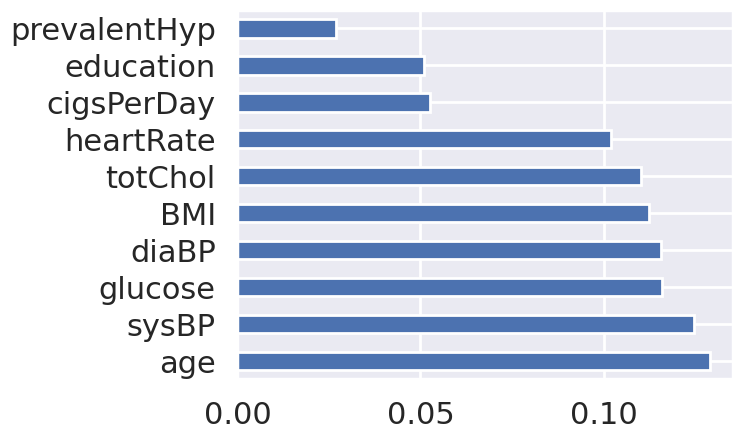

In [ ]:
ranked_features=pd.Series(model.feature_importances_,index=X.columns)
ranked_features.nlargest(10).plot(kind='barh')
plt.show()

In [ ]:
#Dropping least relevant column
data_features = df.drop(['currentSmoker'], axis=1)
data_features.head()

sex  age  education  cigsPerDay  BPMeds  prevalentStroke  prevalentHyp  \
0    1   39        4.0         0.0     0.0                0             0   
1    0   46        2.0         0.0     0.0                0             0   
2    1   48        1.0        20.0     0.0                0             0   
3    0   61        3.0        30.0     0.0                0             1   
4    0   46        3.0        23.0     0.0                0             0   

   diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  TenYearCHD  
0         0    195.0  106.0   70.0  26.97       80.0     77.0           0  
1         0    250.0  121.0   81.0  28.73       95.0     76.0           0  
2         0    245.0  127.5   80.0  25.34       75.0     70.0           0  
3         0    225.0  150.0   95.0  28.58       65.0    103.0           1  
4         0    285.0  130.0   84.0  23.10       85.0     85.0           0

###Statistics on the top features

In [ ]:
import statsmodels.api as sm
X = data_features.iloc[:, 0:14]
y = data_features.iloc[:, 14]
res =sm.Logit(y,X).fit()
res.summary()

Optimization terminated successfully.
         Current function value: 0.396757
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             TenYearCHD   No. Observations:                 3658
Model:                          Logit   Df Residuals:                     3644
Method:                           MLE   Df Model:                           13
Date:                Fri, 25 Oct 2024   Pseudo R-squ.:                 0.07001
Time:                        05:37:26   Log-Likelihood:                -1451.3
converged:                       True   LL-Null:                       -1560.6
Covariance Type:            nonrobust   LLR p-value:                 2.113e-39
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
sex                 0.4023      0.105      3.847      0.000       0.197       0.607
age                 0.0290      0.006      4.955      0.000       0.018       0.040
education          -0.1997      0.048     -4.151      0.000      -0.294      -0.105
cigsPerDay          0.0142      0.004      3.414      0.001       0.006       0.022
BPMeds              0.3689      0.230      1.601      0.109      -0.083       0.820
prevalentStroke     0.7114      0.485      1.467      0.142      -0.239       1.662
prevalentHyp        0.9304      0.124      7.500      0.000       0.687       1.173
diabetes            0.7422      0.298      2.495      0.013       0.159       1.325
totChol            -0.0011      0.001     -0.953      0.340      -0.003       0.001
sysBP               0.0126      0.004      3.313      0.001       0.005       0.020
diaBP              -0.0261      0.006     -4.258      0.000      -0.038      -0.014
BMI                -0.0472      0.012     -3.848      0.000      -0.071      -0.023
heartRate          -0.0229      0.004     -5.789      0.000      -0.031      -0.015
glucose             0.0020      0.002      0.942      0.346      -0.002       0.006
===================================================================================
"""

##Models and Predictions


Given the significant class imbalance in the dataset, with about six negative cases for every positive case, there is a risk of creating a classifier biased toward the negative class. While this could result in high accuracy, it would likely lead to poor precision and recall. To address this, we will use the Synthetic Minority Oversampling Technique (SMOTE) to balance the dataset. SMOTE generates synthetic samples for the minority class, helping to achieve a more balanced distribution, which can enhance the performance and fairness of our predictive model.

In [ ]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from collections import Counter

In [ ]:
X = data_features.iloc[:, 0:14]
y = data_features.iloc[:, 14]

In [ ]:
X.head()

sex  age  education  cigsPerDay  BPMeds  prevalentStroke  prevalentHyp  \
0    1   39        4.0         0.0     0.0                0             0   
1    0   46        2.0         0.0     0.0                0             0   
2    1   48        1.0        20.0     0.0                0             0   
3    0   61        3.0        30.0     0.0                0             1   
4    0   46        3.0        23.0     0.0                0             0   

   diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  
0         0    195.0  106.0   70.0  26.97       80.0     77.0  
1         0    250.0  121.0   81.0  28.73       95.0     76.0  
2         0    245.0  127.5   80.0  25.34       75.0     70.0  
3         0    225.0  150.0   95.0  28.58       65.0    103.0  
4         0    285.0  130.0   84.0  23.10       85.0     85.0

In [ ]:
# The numbers before SMOTE
num_before = dict(Counter(y))

# Perform SMOTE and Define Pipeline
over=SMOTE(sampling_strategy=0.8)
under=RandomUnderSampler(sampling_strategy=0.8)
steps=[("o",over),("u",under)]
pipeline = Pipeline(steps=steps)

# Transform the dataset
X_smote,y_smote=pipeline.fit_resample(X,y)

# The numbers after SMOTE
num_after=dict(Counter(y_smote))

In [ ]:
print(num_before,num_after)

{0: 3101, 1: 557} {0: 3100, 1: 2480}


<ipython-input-62-ef62d41ab374>:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


<ipython-input-62-ef62d41ab374>:7: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




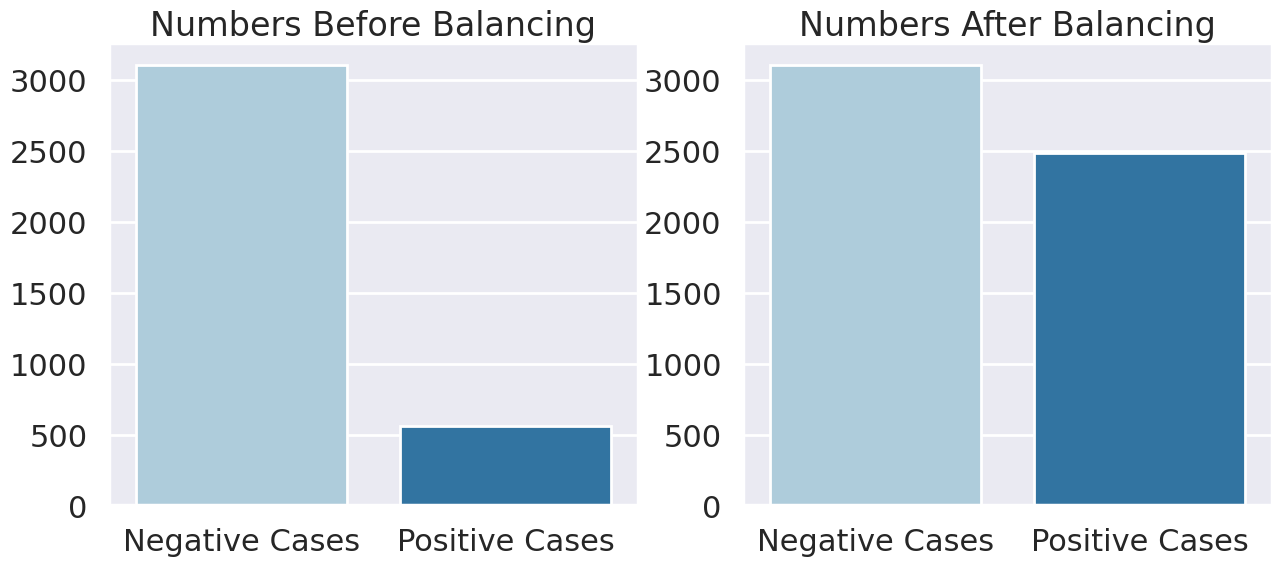

In [ ]:
labels = ["Negative Cases","Positive Cases"]
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.barplot(x=labels, y=list(num_before.values()),palette="Paired")
plt.title("Numbers Before Balancing")
plt.subplot(1,2,2)
sns.barplot(x=labels, y=list(num_after.values()),palette="Paired")
plt.title("Numbers After Balancing")
plt.show()

In [ ]:
df.head()

sex  age  education  currentSmoker  cigsPerDay  BPMeds  prevalentStroke  \
0    1   39        4.0              0         0.0     0.0                0   
1    0   46        2.0              0         0.0     0.0                0   
2    1   48        1.0              1        20.0     0.0                0   
3    0   61        3.0              1        30.0     0.0                0   
4    0   46        3.0              1        23.0     0.0                0   

   prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  \
0             0         0    195.0  106.0   70.0  26.97       80.0     77.0   
1             0         0    250.0  121.0   81.0  28.73       95.0     76.0   
2             0         0    245.0  127.5   80.0  25.34       75.0     70.0   
3             1         0    225.0  150.0   95.0  28.58       65.0    103.0   
4             0         0    285.0  130.0   84.0  23.10       85.0     85.0   

   TenYearCHD  
0           0  
1           0  
2           0  
3           1  
4           0

Following the application of SMOTE, the dataset has been substantially balanced. The new ratio between negative and positive cases now stands at approximately 1:1.2, which is a significant improvement compared to the original imbalance of 1:5.57. This balancing of the dataset enhances our ability to develop and evaluate predictive models, ensuring that both positive and negative cases are adequately represented in the data.

###Splitting the dataset

In [ ]:
data_features.columns

Index(['sex', 'age', 'education', 'cigsPerDay', 'BPMeds', 'prevalentStroke',
       'prevalentHyp', 'diabetes', 'totChol', 'sysBP', 'diaBP', 'BMI',
       'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [ ]:
new_data = pd.concat([pd.DataFrame(X_smote), pd.DataFrame(y_smote)], axis=1)
new_data.columns = ['age','education' ,'sex', 'cigsPerDay', 'BPMeds', 'prevalentStroke', 'prevalentHyp',
'diabetes', 'totChol', 'sysBP', 'diaBP','BMI', 'heartRate', 'glucose', 'TenYearCHD']
new_data.head()

age  education  sex  cigsPerDay  BPMeds  prevalentStroke  prevalentHyp  \
3084    0         36  3.0        15.0     0.0                0             0   
660     0         63  1.0         0.0     0.0                0             0   
3220    0         44  3.0        20.0     0.0                0             1   
752     0         53  2.0        10.0     0.0                0             1   
2137    0         37  1.0        20.0     0.0                0             0   

      diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  TenYearCHD  
3084         0    202.0  105.5   67.0  22.66       90.0     63.0           0  
660          0    250.0  117.5   75.0  25.88       75.0     91.0           0  
3220         0    284.0  143.0   92.0  21.19       84.0     88.0           0  
752          0    261.0  136.0   99.0  21.02       85.0     94.0           0  
2137         0    200.0  112.5   68.0  25.87       65.0     67.0           0

In [ ]:
X_new = new_data.iloc[:, 0:14]
y_new= new_data.iloc[:,-1]
X_new.head()

age  education  sex  cigsPerDay  BPMeds  prevalentStroke  prevalentHyp  \
3084    0         36  3.0        15.0     0.0                0             0   
660     0         63  1.0         0.0     0.0                0             0   
3220    0         44  3.0        20.0     0.0                0             1   
752     0         53  2.0        10.0     0.0                0             1   
2137    0         37  1.0        20.0     0.0                0             0   

      diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  
3084         0    202.0  105.5   67.0  22.66       90.0     63.0  
660          0    250.0  117.5   75.0  25.88       75.0     91.0  
3220         0    284.0  143.0   92.0  21.19       84.0     88.0  
752          0    261.0  136.0   99.0  21.02       85.0     94.0  
2137         0    200.0  112.5   68.0  25.87       65.0     67.0

In [ ]:
# split the dataset
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_new,y_new,test_size=.2,random_state=42)

###Feature Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [ ]:
X_train_scaled=scaler.fit_transform(X_train)
X_train=pd.DataFrame(X_train_scaled)

X_test_scaled=scaler.transform(X_test)
X_test=pd.DataFrame(X_test_scaled)

##Random Forest Classifier

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import recall_score,precision_score,classification_report,roc_auc_score,roc_curve

In [ ]:
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt']
}

In [ ]:
# Instantiate the RandomForestClassifier
rf_classifier = RandomForestClassifier(random_state=42)

In [ ]:
# Grid Search
grid_search = GridSearchCV(rf_classifier, param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning:


540 fits failed out of a total of 1080.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
338 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/ut

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 150]})

In [ ]:
# Access the best hyperparameters
best_params = grid_search.best_params_

In [ ]:
# predictions
rf_predict = grid_search.predict(X_test)

In [ ]:
#accuracy
rf_accuracy = accuracy_score(y_test,rf_predict)
print(f"Using random forest we get an accuracy of {round(rf_accuracy*100,2)}%")

Using random forest we get an accuracy of 88.71%


<Axes: >

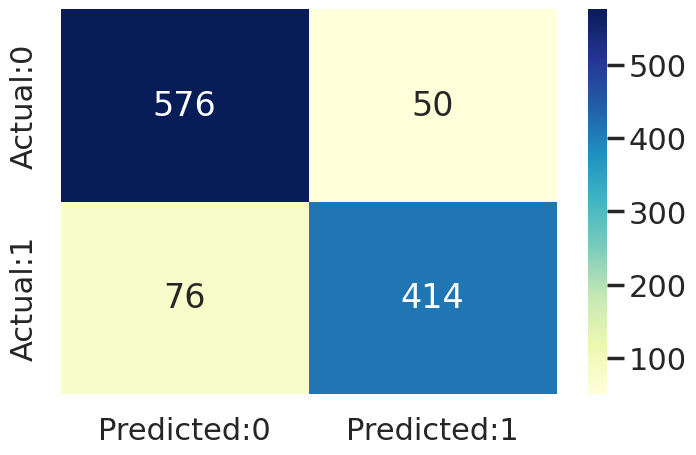

In [ ]:
cm=confusion_matrix(y_test,rf_predict)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

In [ ]:
print(classification_report(y_test,rf_predict))

              precision    recall  f1-score   support

           0       0.88      0.92      0.90       626
           1       0.89      0.84      0.87       490

    accuracy                           0.89      1116
   macro avg       0.89      0.88      0.88      1116
weighted avg       0.89      0.89      0.89      1116



In [ ]:
rf_f1 = f1_score(y_test, rf_predict)
print(f'The f1 score for RFC is {round(rf_f1*100,2)}%')

The f1 score for RFC is 86.79%


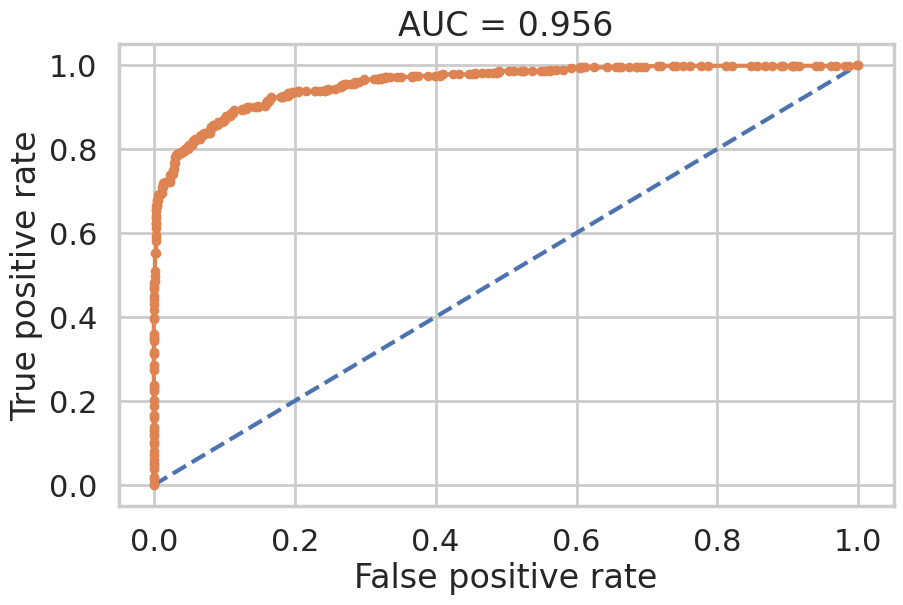

In [ ]:
# ROC curve and AUC
probs = grid_search.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
rf_auc = roc_auc_score(y_test, probs)

# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test, probs)
# plot curve
sns.set_style('whitegrid')
plt.figure(figsize=(10,6))
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.title(f"AUC = {round(rf_auc,3)}")
plt.show()

In [ ]:
comparison = pd.DataFrame({
    "Random Forest Classifier":{'Accuracy':rf_accuracy, 'AUC':rf_auc, 'F1 score':rf_f1},
}).T
comparison

Accuracy       AUC  F1 score
Random Forest Classifier  0.887097  0.956349  0.867925

In [ ]:
df.sample(10)

sex  age  education  currentSmoker  cigsPerDay  BPMeds  prevalentStroke  \
4189    1   54        2.0              1        20.0     0.0                0   
3589    1   53        1.0              1        43.0     0.0                0   
1686    1   35        3.0              1        15.0     0.0                0   
389     0   39        2.0              1        20.0     0.0                0   
559     0   37        4.0              1        20.0     0.0                0   
743     0   48        4.0              1         3.0     0.0                0   
1539    0   53        1.0              1        40.0     0.0                0   
262     0   46        1.0              0         0.0     0.0                0   
2875    1   41        2.0              1        20.0     0.0                0   
2437    1   59        2.0              1        20.0     0.0                0   

      prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  \
4189             0         0    261.0  117.0   74.0  20.88       80.0   
3589             1         0    246.0  176.0  109.0  32.32       72.0   
1686             0         0    215.0  133.0   86.0  28.70       86.0   
389              0         0    185.0  111.0   67.0  23.87       70.0   
559              0         0    240.0  120.0   79.0  23.09       75.0   
743              0         0    249.0  132.0   78.0  23.10       70.0   
1539             0         0    183.0  129.0   80.0  26.51       78.0   
262              0         0    219.0  150.0   81.0  25.43       69.0   
2875             0         0    264.0  126.5   82.0  23.96       75.0   
2437             1         0    266.0  165.0   99.0  29.07       96.0   

      glucose  TenYearCHD  
4189     77.0           1  
3589     59.0           0  
1686     84.0           0  
389      87.0           0  
559      80.0           0  
743     137.0           0  
1539     80.0           0  
262      93.0           0  
2875     78.0           1  
2437     82.0           1

In [ ]:
def get_user_input():
    print("Please enter the following details:")
    age = int(input("Age: "))
    education = int(input("Education level (1=Some high school, 2=High school/GED, 3=Some college, 4=College graduate): "))
    sex = input("Sex (male/female): ").lower() == "male"  # Assuming male=1, female=0
    cigs_per_day = float(input("Cigarettes per day: "))
    bp_meds = input("On blood pressure medications? (yes/no): ").lower() == "yes"
    prevalent_stroke = input("History of prevalent stroke? (yes/no): ").lower() == "yes"
    prevalent_hyp = input("History of prevalent hypertension? (yes/no): ").lower() == "yes"
    diabetes = input("Have diabetes? (yes/no): ").lower() == "yes"
    tot_chol = float(input("Total cholesterol (mg/dL): "))
    sys_bp = float(input("Systolic blood pressure (mm Hg): "))
    dia_bp = float(input("Diastolic blood pressure (mm Hg): "))
    bmi = float(input("Body Mass Index: "))
    heart_rate = int(input("Heart rate (beats per minute): "))
    glucose = float(input("Glucose level (mg/dL): "))

    # Convert boolean inputs to integers (assuming yes=1, no=0)
    user_data = [
        age, education, int(sex), cigs_per_day, int(bp_meds),
        int(prevalent_stroke), int(prevalent_hyp), int(diabetes), tot_chol,
        sys_bp, dia_bp, bmi, heart_rate, glucose
    ]
    return user_data


In [ ]:
def predict(model, user_input):
    # Assuming the model expects a numpy array of shape (1, -1)
    user_input = np.array(user_input).reshape(1, -1)
    prediction = model.predict(user_input)
    return prediction

In [ ]:
def main():
    # Assuming the model is loaded as rf_classifier
    user_input = get_user_input()
    x = new_data.drop('TenYearCHD', axis=1)
    y = new_data['TenYearCHD']
    rf_classifier.fit(x, y)
    prediction = predict(rf_classifier, user_input)
    print("The predicted risk of heart disease in the next ten years is:", "High" if prediction[0] == 1 else "Low")

if __name__ == "__main__":
    main()


Please enter the following details:
